# Proyecto del módulo II
## Juan Manuel Zapata López
---

# Paqueterías

In [1]:
from functions_ok import *
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# TAD

In [2]:
#importar tabla
df = pd.read_csv("nasa.csv")
df.head()

Neo Reference ID     Name  Absolute Magnitude  Est Dia in KM(min)  \
0           3703080  3703080               21.60                0.13   
1           3723955  3723955               21.30                0.15   
2           2446862  2446862               20.30                0.23   
3           3092506  3092506               27.40                0.01   
4           3514799  3514799               21.60                0.13   

   Est Dia in KM(max)  Est Dia in M(min)  Est Dia in M(max)  \
0                0.28             127.22             284.47   
1                0.33             146.07             326.62   
2                0.52             231.50             517.65   
3                0.02               8.80              19.68   
4                0.28             127.22             284.47   

   Est Dia in Miles(min)  Est Dia in Miles(max)  Est Dia in Feet(min)  \
0                   0.08                   0.18                417.39   
1                   0.09                   0.20                479.23   
2                   0.14                   0.32                759.52   
3                   0.01                   0.01                 28.88   
4                   0.08                   0.18                417.39   

   Est Dia in Feet(max) Close Approach Date  Epoch Date Close Approach  \
0                933.31          1995-01-01               788947200000   
1               1071.58          1995-01-01               788947200000   
2               1698.34          1995-01-08               789552000000   
3                 64.57          1995-01-15               790156800000   
4                933.31          1995-01-15               790156800000   

   Relative Velocity km per sec  Relative Velocity km per hr  Miles per hour  \
0                          6.12                     22017.00        13680.51   
1                         18.11                     65210.35        40519.17   
2                          7.59                     27326.56        16979.66   
3                         11.17                     40225.95        24994.84   
4                          9.84                     35426.99        22012.95   

   Miss Dist.(Astronomical)  Miss Dist.(lunar)  Miss Dist.(kilometers)  \
0                      0.42             163.18             62753692.00   
1                      0.38             148.99             57298148.00   
2                      0.05              19.82              7622911.50   
3                      0.29             110.99             42683616.00   
4                      0.41             158.65             61010824.00   

   Miss Dist.(miles) Orbiting Body  Orbit ID Orbit Determination Date  \
0        38993336.00         Earth        17      2017-04-06 08:36:37   
1        35603420.00         Earth        21      2017-04-06 08:32:49   
2         4736657.50         Earth        22      2017-04-06 09:20:19   
3        26522368.00         Earth         7      2017-04-06 09:15:49   
4        37910368.00         Earth        25      2017-04-06 08:57:58   

   Orbit Uncertainity  Minimum Orbit Intersection  \
0                   5                        0.03   
1                   3                        0.19   
2                   0                        0.04   
3                   6                        0.01   
4                   1                        0.03   

   Jupiter Tisserand Invariant  Epoch Osculation  Eccentricity  \
0                         4.63        2458000.50          0.43   
1                         5.46        2458000.50          0.35   
2                         4.56        2458000.50          0.35   
3                         5.09        2458000.50          0.22   
4                         5.15        2458000.50          0.21   

   Semi Major Axis  Inclination  Asc Node Longitude  Orbital Period  \
0             1.41         6.03              314.37          609.60   
1             1.11        28.41              136.72          425.87   
2            

In [3]:
#verificar si hay duplicados
df.duplicated().sum()

0

In [4]:
df.duplicated(subset = ["Neo Reference ID", "Close Approach Date"]).sum()

0

In [5]:
#ver tipo de variables
df.dtypes

Neo Reference ID                  int64
Name                              int64
Absolute Magnitude              float64
Est Dia in KM(min)              float64
Est Dia in KM(max)              float64
Est Dia in M(min)               float64
Est Dia in M(max)               float64
Est Dia in Miles(min)           float64
Est Dia in Miles(max)           float64
Est Dia in Feet(min)            float64
Est Dia in Feet(max)            float64
Close Approach Date              object
Epoch Date Close Approach         int64
Relative Velocity km per sec    float64
Relative Velocity km per hr     float64
Miles per hour                  float64
Miss Dist.(Astronomical)        float64
Miss Dist.(lunar)               float64
Miss Dist.(kilometers)          float64
Miss Dist.(miles)               float64
Orbiting Body                    object
Orbit ID                          int64
Orbit Determination Date         object
Orbit Uncertainity                int64
Minimum Orbit Intersection      float64


In [6]:
#vamos a ver las variables que son tipo object, pues podrían ser texto o tener errores
df.select_dtypes("object")

Close Approach Date Orbiting Body Orbit Determination Date Equinox
0             1995-01-01         Earth      2017-04-06 08:36:37   J2000
1             1995-01-01         Earth      2017-04-06 08:32:49   J2000
2             1995-01-08         Earth      2017-04-06 09:20:19   J2000
3             1995-01-15         Earth      2017-04-06 09:15:49   J2000
4             1995-01-15         Earth      2017-04-06 08:57:58   J2000
...                  ...           ...                      ...     ...
4682          2016-09-08         Earth      2017-04-06 08:24:07   J2000
4683          2016-09-08         Earth      2017-04-06 08:23:58   J2000
4684          2016-09-08         Earth      2017-04-06 08:23:43   J2000
4685          2016-09-08         Earth      2017-04-06 08:23:42   J2000
4686          2016-09-08         Earth      2017-04-29 06:18:33   J2000

[4687 rows x 4 columns]

In [7]:
for col in df.select_dtypes("object").columns:
    print(col)
    display(df[col].value_counts())
    print("\n")

Close Approach Date


2016-07-22    18
2015-01-15    17
2015-02-15    16
2014-11-22    16
2012-03-15    16
              ..
2013-06-15     1
1995-12-22     1
2005-06-15     1
2001-10-22     1
1997-12-22     1
Name: Close Approach Date, Length: 777, dtype: int64



Orbiting Body


Earth    4687
Name: Orbiting Body, dtype: int64



Orbit Determination Date


2017-06-21 06:17:20    9
2017-04-06 08:57:13    8
2017-04-06 09:24:24    8
2017-04-06 08:57:40    7
2017-04-06 09:15:33    7
                      ..
2017-04-06 08:28:51    1
2017-04-06 08:24:11    1
2017-04-06 09:12:26    1
2017-04-06 08:53:39    1
2017-04-06 08:42:49    1
Name: Orbit Determination Date, Length: 2680, dtype: int64



Equinox


J2000    4687
Name: Equinox, dtype: int64

In [8]:
#vamos a convertir las fechas a tipodatetime
df['Close Approach Date'] = pd.to_datetime(df['Close Approach Date'])
df['Orbit Determination Date'] = pd.to_datetime(df['Orbit Determination Date'])   

In [9]:
for col in df.select_dtypes("object").columns:
    print(col)
    display(df[col].value_counts())
    print("\n")

Orbiting Body


Earth    4687
Name: Orbiting Body, dtype: int64



Equinox


J2000    4687
Name: Equinox, dtype: int64

In [10]:
#las variables Orbiting Body y Equinox serán eliminadas, por tomar un único valor
df.drop(columns = ["Orbiting Body", "Equinox"], inplace=True)

In [11]:
#vamos a transformar la variable objetivo a tipo dummy
df["Hazardous"] = df["Hazardous"].map({True:1, False:0})

In [12]:
df.dtypes

Neo Reference ID                         int64
Name                                     int64
Absolute Magnitude                     float64
Est Dia in KM(min)                     float64
Est Dia in KM(max)                     float64
Est Dia in M(min)                      float64
Est Dia in M(max)                      float64
Est Dia in Miles(min)                  float64
Est Dia in Miles(max)                  float64
Est Dia in Feet(min)                   float64
Est Dia in Feet(max)                   float64
Close Approach Date             datetime64[ns]
Epoch Date Close Approach                int64
Relative Velocity km per sec           float64
Relative Velocity km per hr            float64
Miles per hour                         float64
Miss Dist.(Astronomical)               float64
Miss Dist.(lunar)                      float64
Miss Dist.(kilometers)                 float64
Miss Dist.(miles)                      float64
Orbit ID                                 int64
Orbit Determi

In [13]:
#vamos a verificar la completitud
completitud(df)

columna  total  completitud
0               Neo Reference ID      0       100.00
1       Orbit Determination Date      0       100.00
2             Orbit Uncertainity      0       100.00
3     Minimum Orbit Intersection      0       100.00
4    Jupiter Tisserand Invariant      0       100.00
5               Epoch Osculation      0       100.00
6                   Eccentricity      0       100.00
7                Semi Major Axis      0       100.00
8                    Inclination      0       100.00
9             Asc Node Longitude      0       100.00
10                Orbital Period      0       100.00
11           Perihelion Distance      0       100.00
12                Perihelion Arg      0       100.00
13                 Aphelion Dist      0       100.00
14               Perihelion Time      0       100.00
15                  Mean Anomaly      0       100.00
16                      Orbit ID      0       100.00
17             Miss Dist.(miles)      0       100.00
18        Miss Dist.(kilometers)      0       100.00
19             Miss Dist.(lunar)      0       100.00
20                          Name      0       100.00
21            Absolute Magnitude      0       100.00
22            Est Dia in KM(min)      0       100.00
23            Est Dia in KM(max)      0       100.00
24             Est Dia in M(min)      0       100.00
25             Est Dia in M(max)      0       100.00
26         Est Dia in Miles(min)      0       100.00
27                   Mean Motion      0       100.00
28         Est Dia in Miles(max)      0       100.00
29          Est Dia in Feet(max)      0       100.00
30           Close Approach Date      0       100.00
31     Epoch Date Close Approach      0       100.00
32  Relative Velocity km per sec      0       100.00
33   Relative Velocity km per hr      0       100.00
34                Miles per hour      0       100.00
35      Miss Dist.(Astronomical)      0       100.00
36          Est Dia in Feet(min)      0       100.00
37                     Hazardous      0       100.00

In [14]:
#vamos a hacer un describe de las variables numéricas
df.describe()

Neo Reference ID       Name  Absolute Magnitude  Est Dia in KM(min)  \
count           4687.00    4687.00             4687.00             4687.00   
mean         3272297.77 3272297.77               22.27                0.20   
std           548601.08  548601.08                2.89                0.37   
min          2000433.00 2000433.00               11.16                0.00   
25%          3097593.50 3097593.50               20.10                0.03   
50%          3514799.00 3514799.00               21.90                0.11   
75%          3690059.50 3690059.50               24.50                0.25   
max          3781897.00 3781897.00               32.10               15.58   

       Est Dia in KM(max)  Est Dia in M(min)  Est Dia in M(max)  \
count             4687.00            4687.00            4687.00   
mean                 0.46             204.60             457.51   
std                  0.83             369.57             826.39   
min                  0.00               1.01               2.26   
25%                  0.07              33.46              74.82   
50%                  0.25             110.80             247.77   
75%                  0.57             253.84             567.60   
max                 34.84           15579.55           34836.94   

       Est Dia in Miles(min)  Est Dia in Miles(max)  Est Dia in Feet(min)  \
count                4687.00                4687.00               4687.00   
mean                    0.13                   0.28                671.27   
std                     0.23                   0.51               1212.51   
min                     0.00                   0.00                  3.32   
25%                     0.02                   0.05                109.78   
50%                     0.07                   0.15                363.53   
75%                     0.16                   0.35                832.80   
max                     9.68                  21.65              51114.02   

       Est Dia in Feet(max)  Epoch Date Close Approach  \
count               4687.00                    4687.00   
mean                1501.01           1179880584425.01   
std                 2711.26            198153968794.25   
min                    7.41            788947200000.00   
25%                  245.49           1015574400000.00   
50%                  812.88           1203062400000.00   
75%                 1862.19           1355558400000.00   
max               114294.42           1473318000000.00   

       Relative Velocity km per sec  Relative Velocity km per hr  \
count                       4687.00                      4687.00   
mean                          13.97                     50294.92   
std                            7.29                     26255.60   
min                            0.34                      1207.81   
25%                            8.43                     30358.31   
50%                           12.92                     46504.40   
75%                           18.08                     65079.54   
max                           44.63                    160681.49   

       Miles per hour  Miss Dist.(Astronomical)  Miss Dist.(lunar)  \
count         4687.00                   4687.00            4687.00   
mean         31251.31                      0.26              99.89   
std          16314.21                      0.15              56.72   
min            750.49                      0.00               0.07   
25%          18863.48                      0.13              51.90   
50%          28896.03                      0.27             103.10   
75%          40437.89                      0.38             149.44   
max          99841.23                      0.50             194.45   

       Miss Dist.(kilometers)  Miss Dist.(miles)  Orbit ID  \
count                 4687.00            4687.00   4687.00   
mean              38413466.87        23869021.68     28.30   
std               21811097.77        13552787.80     

Para la columna Neo Reference ID se tiene:
Número de outliers por IQR: 353
Número de outliers por percentiles .5 y .95: 470
Los datos no distribuyen normal, se hará una transformación de boxcox
los datos no se pudieron tranformar a una normal, no se puede aplicar z-score
Hay 235 outliers comúnes = 0.05013868145935566%


count       235.00
mean    2071807.64
std       56030.33
min     2000433.00
10%     2003865.40
20%     2007861.80
30%     2021519.00
40%     2040964.20
50%     2067381.00
60%     2088198.00
70%     2130444.00
80%     2138493.60
90%     2144519.40
100%    2153953.00
max     2153953.00
Name: Neo Reference ID, dtype: float64

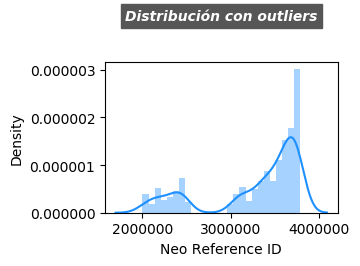

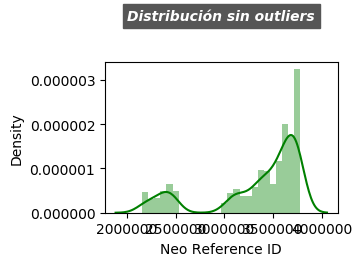

Para la columna Name se tiene:
Número de outliers por IQR: 353
Número de outliers por percentiles .5 y .95: 470
Los datos no distribuyen normal, se hará una transformación de boxcox
los datos no se pudieron tranformar a una normal, no se puede aplicar z-score
Hay 235 outliers comúnes = 0.05013868145935566%


count       235.00
mean    2071807.64
std       56030.33
min     2000433.00
10%     2003865.40
20%     2007861.80
30%     2021519.00
40%     2040964.20
50%     2067381.00
60%     2088198.00
70%     2130444.00
80%     2138493.60
90%     2144519.40
100%    2153953.00
max     2153953.00
Name: Name, dtype: float64

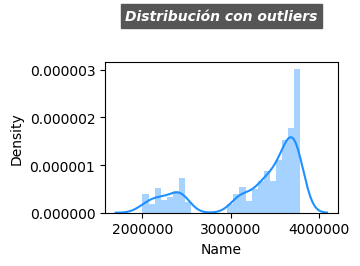

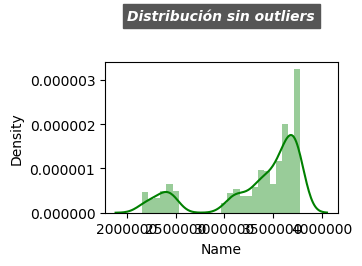

Para la columna Absolute Magnitude se tiene:
Número de outliers por IQR: 2
Número de outliers por percentiles .5 y .95: 464
Los datos no distribuyen normal, se hará una transformación de boxcox
los datos no se pudieron tranformar a una normal, no se puede aplicar z-score
Hay 2 outliers comúnes = 0.0004267121826328142%


count    2.00
mean    21.63
std     14.81
min     11.16
10%     13.25
20%     15.35
30%     17.44
40%     19.54
50%     21.63
60%     23.72
70%     25.82
80%     27.91
90%     30.01
100%    32.10
max     32.10
Name: Absolute Magnitude, dtype: float64

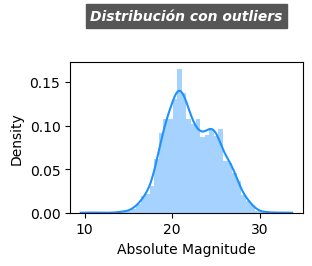

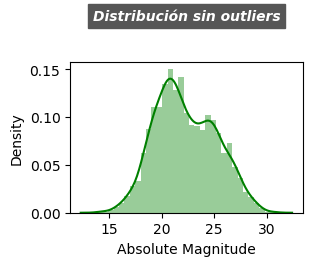

Para la columna Est Dia in KM(min) se tiene:
Número de outliers por IQR: 310
Número de outliers por percentiles .5 y .95: 446
Los datos no distribuyen normal, se hará una transformación de boxcox
los datos no se pudieron tranformar a una normal, no se puede aplicar z-score
Hay 224 outliers comúnes = 0.04779176445487519%


count   224.00
mean      1.24
std       1.12
min       0.70
10%       0.73
20%       0.80
30%       0.84
40%       0.92
50%       0.97
60%       1.11
70%       1.21
80%       1.46
90%       1.76
100%     15.58
max      15.58
Name: Est Dia in KM(min), dtype: float64

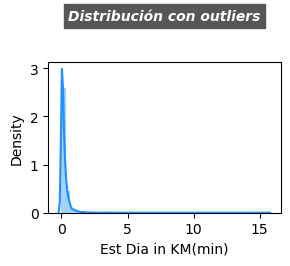

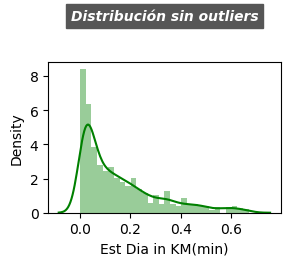

Para la columna Est Dia in KM(max) se tiene:
Número de outliers por IQR: 310
Número de outliers por percentiles .5 y .95: 446
Los datos no distribuyen normal, se hará una transformación de boxcox
los datos no se pudieron tranformar a una normal, no se puede aplicar z-score
Hay 224 outliers comúnes = 0.04779176445487519%


count   224.00
mean      2.78
std       2.51
min       1.56
10%       1.64
20%       1.79
30%       1.88
40%       2.06
50%       2.16
60%       2.48
70%       2.72
80%       3.27
90%       3.93
100%     34.84
max      34.84
Name: Est Dia in KM(max), dtype: float64

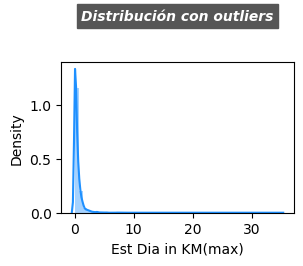

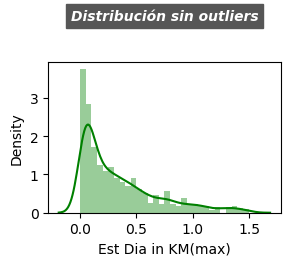

Para la columna Est Dia in M(min) se tiene:
Número de outliers por IQR: 310
Número de outliers por percentiles .5 y .95: 446
Los datos no distribuyen normal, se hará una transformación de boxcox
los datos no se pudieron tranformar a una normal, no se puede aplicar z-score
Hay 224 outliers comúnes = 0.04779176445487519%


count     224.00
mean     1243.77
std      1124.19
min       699.13
10%       732.07
20%       802.70
30%       840.53
40%       921.63
50%       965.06
60%      1108.04
70%      1214.94
80%      1460.68
90%      1756.12
100%    15579.55
max     15579.55
Name: Est Dia in M(min), dtype: float64

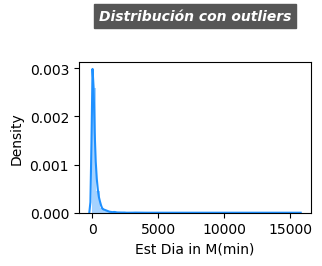

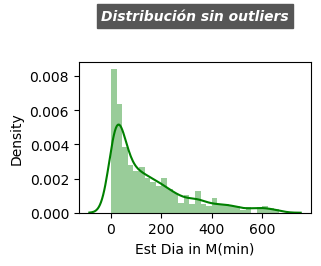

Para la columna Est Dia in M(max) se tiene:
Número de outliers por IQR: 310
Número de outliers por percentiles .5 y .95: 446
Los datos no distribuyen normal, se hará una transformación de boxcox
los datos no se pudieron tranformar a una normal, no se puede aplicar z-score
Hay 224 outliers comúnes = 0.04779176445487519%


count     224.00
mean     2781.16
std      2513.76
min      1563.29
10%      1636.97
20%      1794.90
30%      1879.49
40%      2060.82
50%      2157.94
60%      2477.65
70%      2716.69
80%      3266.18
90%      3926.81
100%    34836.94
max     34836.94
Name: Est Dia in M(max), dtype: float64

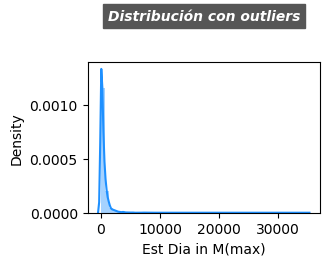

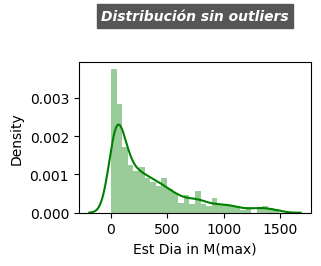

Para la columna Est Dia in Miles(min) se tiene:
Número de outliers por IQR: 310
Número de outliers por percentiles .5 y .95: 446
Los datos no distribuyen normal, se hará una transformación de boxcox
los datos no se pudieron tranformar a una normal, no se puede aplicar z-score
Hay 224 outliers comúnes = 0.04779176445487519%


count   224.00
mean      0.77
std       0.70
min       0.43
10%       0.45
20%       0.50
30%       0.52
40%       0.57
50%       0.60
60%       0.69
70%       0.75
80%       0.91
90%       1.09
100%      9.68
max       9.68
Name: Est Dia in Miles(min), dtype: float64

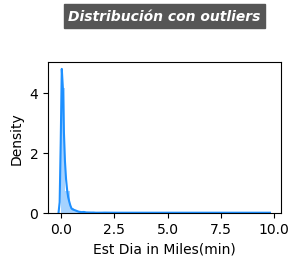

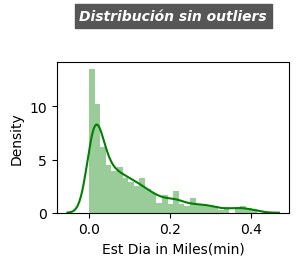

Para la columna Est Dia in Miles(max) se tiene:
Número de outliers por IQR: 310
Número de outliers por percentiles .5 y .95: 446
Los datos no distribuyen normal, se hará una transformación de boxcox
los datos no se pudieron tranformar a una normal, no se puede aplicar z-score
Hay 224 outliers comúnes = 0.04779176445487519%


count   224.00
mean      1.73
std       1.56
min       0.97
10%       1.02
20%       1.12
30%       1.17
40%       1.28
50%       1.34
60%       1.54
70%       1.69
80%       2.03
90%       2.44
100%     21.65
max      21.65
Name: Est Dia in Miles(max), dtype: float64

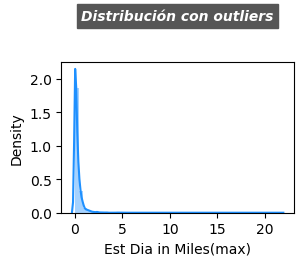

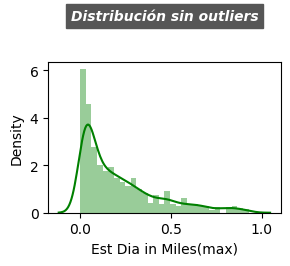

Para la columna Est Dia in Feet(min) se tiene:
Número de outliers por IQR: 310
Número de outliers por percentiles .5 y .95: 446
Los datos no distribuyen normal, se hará una transformación de boxcox
los datos no se pudieron tranformar a una normal, no se puede aplicar z-score
Hay 224 outliers comúnes = 0.04779176445487519%


count     224.00
mean     4080.62
std      3688.29
min      2293.72
10%      2401.82
20%      2633.54
30%      2757.66
40%      3023.71
50%      3166.21
60%      3635.30
70%      3986.03
80%      4792.26
90%      5761.56
100%    51114.02
max     51114.02
Name: Est Dia in Feet(min), dtype: float64

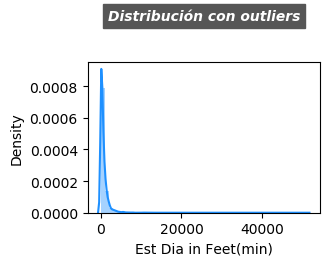

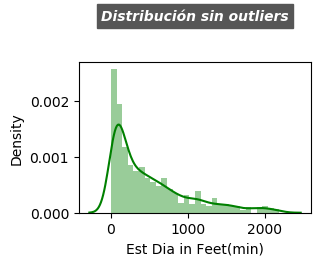

Para la columna Est Dia in Feet(max) se tiene:
Número de outliers por IQR: 310
Número de outliers por percentiles .5 y .95: 446
Los datos no distribuyen normal, se hará una transformación de boxcox
los datos no se pudieron tranformar a una normal, no se puede aplicar z-score
Hay 224 outliers comúnes = 0.04779176445487519%


count      224.00
mean      9124.54
std       8247.26
min       5128.91
10%       5370.63
20%       5888.78
30%       6166.31
40%       6761.22
50%       7079.87
60%       8128.77
70%       8913.02
80%      10715.81
90%      12883.24
100%    114294.42
max     114294.42
Name: Est Dia in Feet(max), dtype: float64

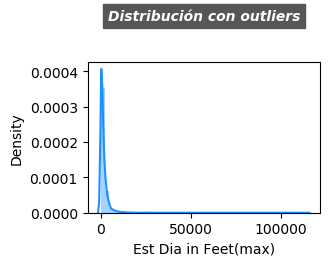

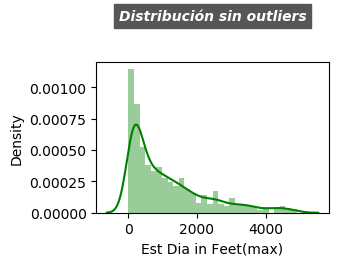

Para la columna Epoch Date Close Approach se tiene:
Número de outliers por IQR: 0
Número de outliers por percentiles .5 y .95: 470
Los datos no distribuyen normal, se hará una transformación de boxcox
los datos no se pudieron tranformar a una normal, no se puede aplicar z-score
Hay 0 outliers comúnes = 0.0%


count   0.00
mean     nan
std      nan
min      nan
10%      nan
20%      nan
30%      nan
40%      nan
50%      nan
60%      nan
70%      nan
80%      nan
90%      nan
100%     nan
max      nan
Name: Epoch Date Close Approach, dtype: float64

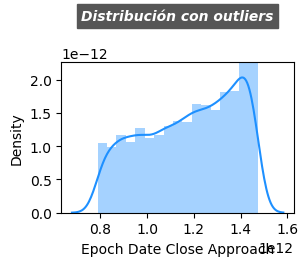

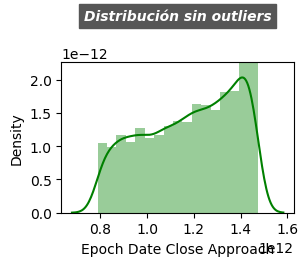

Para la columna Relative Velocity km per sec se tiene:
Número de outliers por IQR: 101
Número de outliers por percentiles .5 y .95: 470
Los datos no distribuyen normal, se hará una transformación de boxcox
los datos no se pudieron tranformar a una normal, no se puede aplicar z-score
Hay 101 outliers comúnes = 0.021548965222957114%


count   101.00
mean     36.43
std       2.82
min      32.56
10%      33.07
20%      33.93
30%      34.70
40%      35.23
50%      35.75
60%      36.50
70%      37.94
80%      39.06
90%      40.17
100%     44.63
max      44.63
Name: Relative Velocity km per sec, dtype: float64

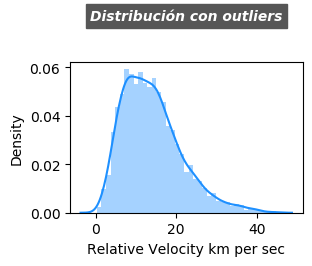

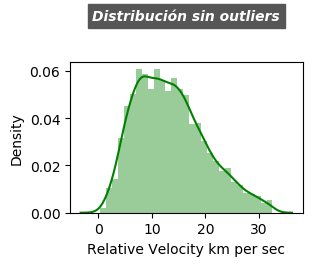

Para la columna Relative Velocity km per hr se tiene:
Número de outliers por IQR: 101
Número de outliers por percentiles .5 y .95: 470
Los datos no distribuyen normal, se hará una transformación de boxcox
los datos no se pudieron tranformar a una normal, no se puede aplicar z-score
Hay 101 outliers comúnes = 0.021548965222957114%


count      101.00
mean    131164.23
std      10144.22
min     117215.09
10%     119053.53
20%     122142.38
30%     124932.01
40%     126831.78
50%     128711.91
60%     131398.32
70%     136572.31
80%     140611.51
90%     144595.80
100%    160681.49
max     160681.49
Name: Relative Velocity km per hr, dtype: float64

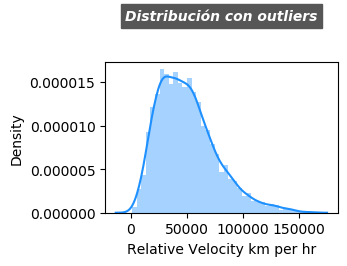

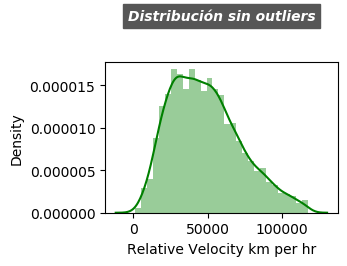

Para la columna Miles per hour se tiene:
Número de outliers por IQR: 101
Número de outliers por percentiles .5 y .95: 470
Los datos no distribuyen normal, se hará una transformación de boxcox
los datos no se pudieron tranformar a una normal, no se puede aplicar z-score
Hay 101 outliers comúnes = 0.021548965222957114%


count     101.00
mean    81500.35
std      6303.22
min     72832.90
10%     73975.24
20%     75894.52
30%     77627.89
40%     78808.34
50%     79976.57
60%     81645.80
70%     84860.72
80%     87370.52
90%     89846.21
100%    99841.23
max     99841.23
Name: Miles per hour, dtype: float64

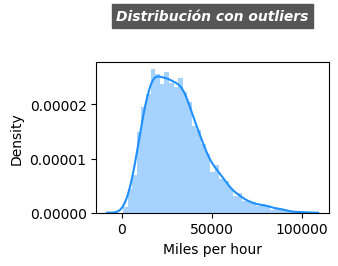

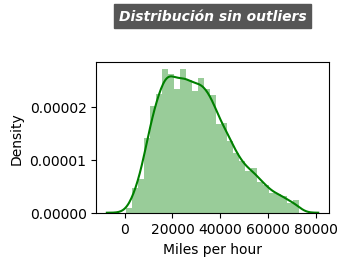

Para la columna Miss Dist.(Astronomical) se tiene:
Número de outliers por IQR: 0
Número de outliers por percentiles .5 y .95: 470
Los datos no distribuyen normal, se hará una transformación de boxcox
los datos no se pudieron tranformar a una normal, no se puede aplicar z-score
Hay 0 outliers comúnes = 0.0%


count   0.00
mean     nan
std      nan
min      nan
10%      nan
20%      nan
30%      nan
40%      nan
50%      nan
60%      nan
70%      nan
80%      nan
90%      nan
100%     nan
max      nan
Name: Miss Dist.(Astronomical), dtype: float64

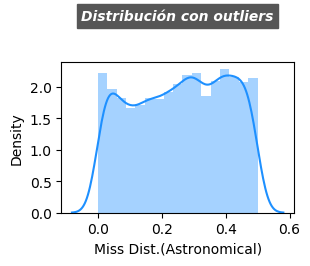

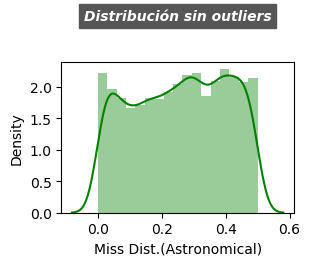

Para la columna Miss Dist.(lunar) se tiene:
Número de outliers por IQR: 0
Número de outliers por percentiles .5 y .95: 470
Los datos no distribuyen normal, se hará una transformación de boxcox
los datos no se pudieron tranformar a una normal, no se puede aplicar z-score
Hay 0 outliers comúnes = 0.0%


count   0.00
mean     nan
std      nan
min      nan
10%      nan
20%      nan
30%      nan
40%      nan
50%      nan
60%      nan
70%      nan
80%      nan
90%      nan
100%     nan
max      nan
Name: Miss Dist.(lunar), dtype: float64

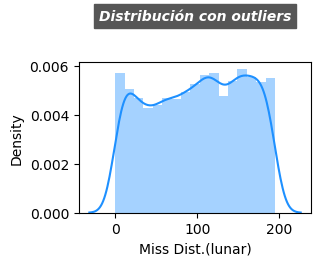

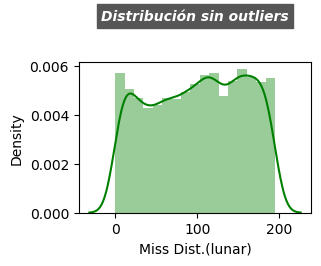

Para la columna Miss Dist.(kilometers) se tiene:
Número de outliers por IQR: 0
Número de outliers por percentiles .5 y .95: 470
Los datos no distribuyen normal, se hará una transformación de boxcox
los datos no se pudieron tranformar a una normal, no se puede aplicar z-score
Hay 0 outliers comúnes = 0.0%


count   0.00
mean     nan
std      nan
min      nan
10%      nan
20%      nan
30%      nan
40%      nan
50%      nan
60%      nan
70%      nan
80%      nan
90%      nan
100%     nan
max      nan
Name: Miss Dist.(kilometers), dtype: float64

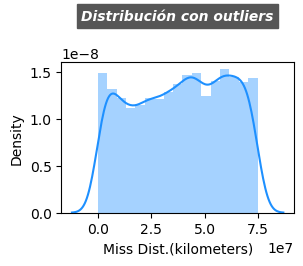

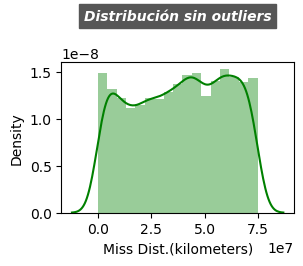

Para la columna Miss Dist.(miles) se tiene:
Número de outliers por IQR: 0
Número de outliers por percentiles .5 y .95: 470
Los datos no distribuyen normal, se hará una transformación de boxcox
los datos no se pudieron tranformar a una normal, no se puede aplicar z-score
Hay 0 outliers comúnes = 0.0%


count   0.00
mean     nan
std      nan
min      nan
10%      nan
20%      nan
30%      nan
40%      nan
50%      nan
60%      nan
70%      nan
80%      nan
90%      nan
100%     nan
max      nan
Name: Miss Dist.(miles), dtype: float64

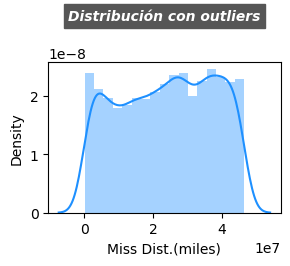

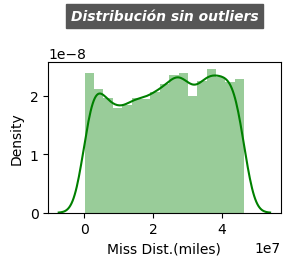

Para la columna Orbit ID se tiene:
Número de outliers por IQR: 458
Número de outliers por percentiles .5 y .95: 354
Los datos no distribuyen normal, se hará una transformación de boxcox
los datos no se pudieron tranformar a una normal, no se puede aplicar z-score
Hay 234 outliers comúnes = 0.04992532536803926%


count   234.00
mean    156.13
std      76.75
min      93.00
10%      97.00
20%     103.00
30%     109.00
40%     117.00
50%     130.50
60%     146.80
70%     164.10
80%     186.20
90%     250.00
100%    611.00
max     611.00
Name: Orbit ID, dtype: float64

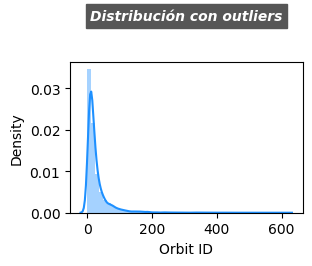

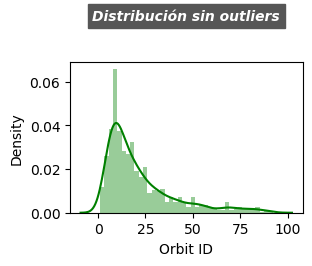

Para la columna Orbit Uncertainity se tiene:
Número de outliers por IQR: 0
Número de outliers por percentiles .5 y .95: 123
Los datos no distribuyen normal, se hará una transformación de boxcox
los datos no se pudieron tranformar a una normal, no se puede aplicar z-score
Hay 0 outliers comúnes = 0.0%


count   0.00
mean     nan
std      nan
min      nan
10%      nan
20%      nan
30%      nan
40%      nan
50%      nan
60%      nan
70%      nan
80%      nan
90%      nan
100%     nan
max      nan
Name: Orbit Uncertainity, dtype: float64

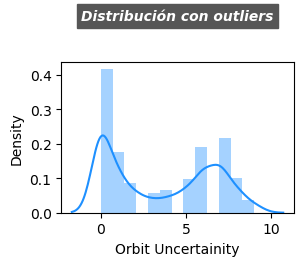

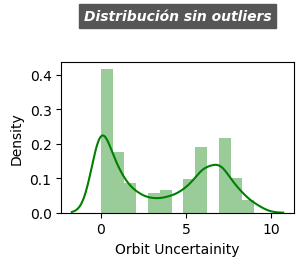

Para la columna Minimum Orbit Intersection se tiene:
Número de outliers por IQR: 197
Número de outliers por percentiles .5 y .95: 470
Los datos no distribuyen normal, se hará una transformación de boxcox
los datos no se pudieron tranformar a una normal, no se puede aplicar z-score
Hay 197 outliers comúnes = 0.042031149989332196%


count   197.00
mean      0.34
std       0.05
min       0.29
10%       0.29
20%       0.30
30%       0.31
40%       0.32
50%       0.33
60%       0.35
70%       0.37
80%       0.39
90%       0.42
100%      0.48
max       0.48
Name: Minimum Orbit Intersection, dtype: float64

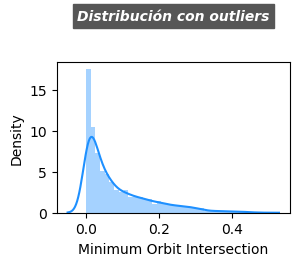

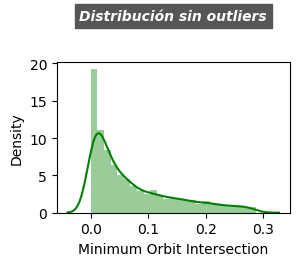

Para la columna Jupiter Tisserand Invariant se tiene:
Número de outliers por IQR: 1
Número de outliers por percentiles .5 y .95: 469
Los datos no distribuyen normal, se hará una transformación de boxcox
los datos no se pudieron tranformar a una normal, no se puede aplicar z-score
Hay 1 outliers comúnes = 0.0002133560913164071%


count   1.00
mean    9.03
std      nan
min     9.03
10%     9.03
20%     9.03
30%     9.03
40%     9.03
50%     9.03
60%     9.03
70%     9.03
80%     9.03
90%     9.03
100%    9.03
max     9.03
Name: Jupiter Tisserand Invariant, dtype: float64

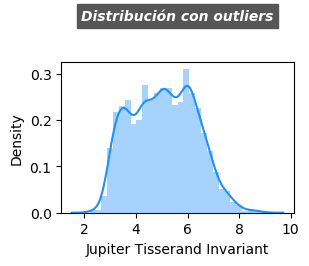

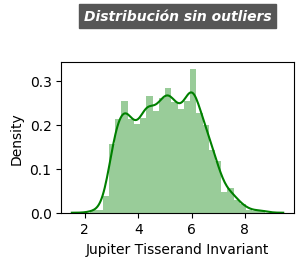

Para la columna Epoch Osculation se tiene:
Número de outliers por IQR: 639
Número de outliers por percentiles .5 y .95: 236
Los datos no distribuyen normal, se hará una transformación de boxcox
Los datos transformados distribuyen normal
Número de outliers por z-score: 165
Hay 165 outliers comúnes = 0.03520375506720717%


count       165.00
mean    2453694.07
std        1061.16
min     2450164.50
10%     2452197.30
20%     2453006.50
30%     2453336.70
40%     2453662.90
50%     2453801.50
60%     2454151.70
70%     2454496.30
80%     2454718.10
90%     2454779.10
100%    2454941.50
max     2454941.50
Name: Epoch Osculation, dtype: float64

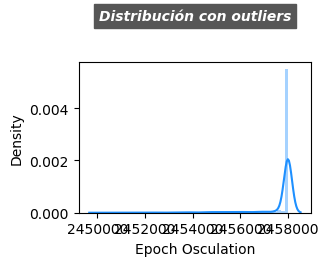

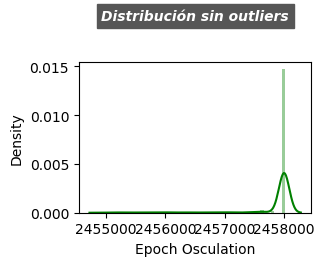

Para la columna Eccentricity se tiene:
Número de outliers por IQR: 3
Número de outliers por percentiles .5 y .95: 470
Los datos no distribuyen normal, se hará una transformación de boxcox
los datos no se pudieron tranformar a una normal, no se puede aplicar z-score
Hay 3 outliers comúnes = 0.0006400682739492212%


count   3.00
mean    0.94
std     0.02
min     0.93
10%     0.93
20%     0.93
30%     0.93
40%     0.93
50%     0.93
60%     0.93
70%     0.94
80%     0.95
90%     0.95
100%    0.96
max     0.96
Name: Eccentricity, dtype: float64

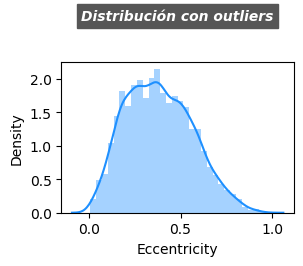

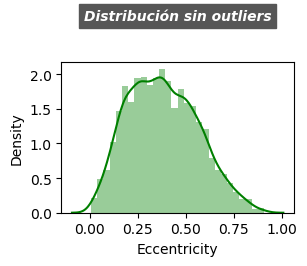

Para la columna Semi Major Axis se tiene:
Número de outliers por IQR: 86
Número de outliers por percentiles .5 y .95: 470
Los datos no distribuyen normal, se hará una transformación de boxcox
los datos no se pudieron tranformar a una normal, no se puede aplicar z-score
Hay 86 outliers comúnes = 0.01834862385321101%


count   86.00
mean     2.95
std      0.33
min      2.70
10%      2.72
20%      2.75
30%      2.80
40%      2.83
50%      2.85
60%      2.88
70%      2.95
80%      3.04
90%      3.25
100%     5.07
max      5.07
Name: Semi Major Axis, dtype: float64

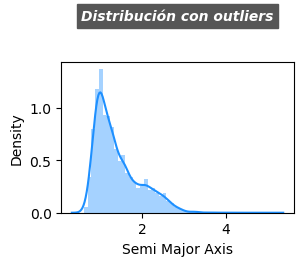

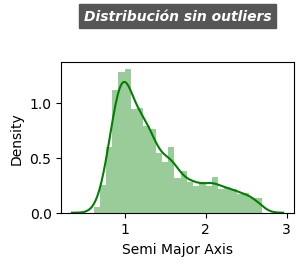

Para la columna Inclination se tiene:
Número de outliers por IQR: 103
Número de outliers por percentiles .5 y .95: 470
Los datos no distribuyen normal, se hará una transformación de boxcox
los datos no se pudieron tranformar a una normal, no se puede aplicar z-score
Hay 103 outliers comúnes = 0.02197567740558993%


count   103.00
mean     50.83
std       7.16
min      41.39
10%      42.21
20%      44.23
30%      45.50
40%      47.72
50%      49.90
60%      52.47
70%      54.31
80%      55.83
90%      60.82
100%     75.41
max      75.41
Name: Inclination, dtype: float64

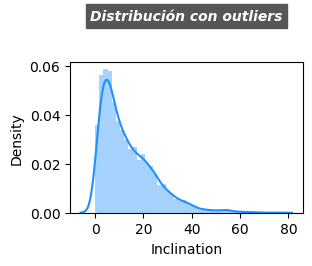

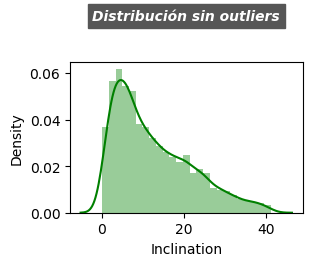

Para la columna Asc Node Longitude se tiene:
Número de outliers por IQR: 0
Número de outliers por percentiles .5 y .95: 470
Los datos no distribuyen normal, se hará una transformación de boxcox
los datos no se pudieron tranformar a una normal, no se puede aplicar z-score
Hay 0 outliers comúnes = 0.0%


count   0.00
mean     nan
std      nan
min      nan
10%      nan
20%      nan
30%      nan
40%      nan
50%      nan
60%      nan
70%      nan
80%      nan
90%      nan
100%     nan
max      nan
Name: Asc Node Longitude, dtype: float64

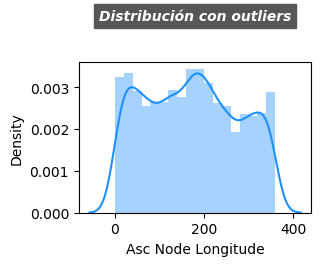

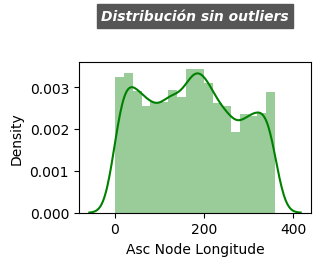

Para la columna Orbital Period se tiene:
Número de outliers por IQR: 220
Número de outliers por percentiles .5 y .95: 470
Los datos no distribuyen normal, se hará una transformación de boxcox
los datos no se pudieron tranformar a una normal, no se puede aplicar z-score
Hay 220 outliers comúnes = 0.04693834008960956%


count    220.00
mean    1649.24
std      272.35
min     1437.63
10%     1451.70
20%     1479.73
30%     1503.96
40%     1547.85
50%     1579.61
60%     1609.83
70%     1670.01
80%     1753.18
90%     1865.25
100%    4172.23
max     4172.23
Name: Orbital Period, dtype: float64

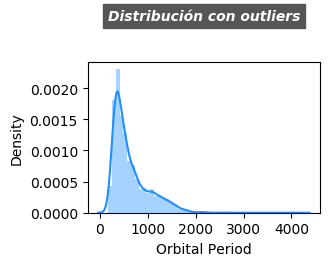

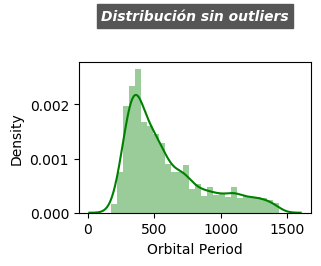

Para la columna Perihelion Distance se tiene:
Número de outliers por IQR: 1
Número de outliers por percentiles .5 y .95: 468
Los datos no distribuyen normal, se hará una transformación de boxcox
los datos no se pudieron tranformar a una normal, no se puede aplicar z-score
Hay 1 outliers comúnes = 0.0002133560913164071%


count   1.00
mean    0.08
std      nan
min     0.08
10%     0.08
20%     0.08
30%     0.08
40%     0.08
50%     0.08
60%     0.08
70%     0.08
80%     0.08
90%     0.08
100%    0.08
max     0.08
Name: Perihelion Distance, dtype: float64

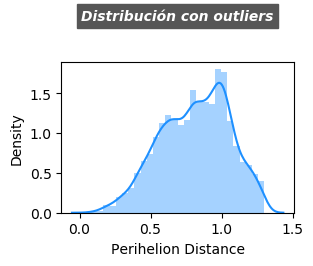

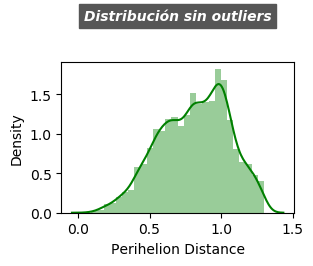

Para la columna Perihelion Arg se tiene:
Número de outliers por IQR: 0
Número de outliers por percentiles .5 y .95: 469
Los datos no distribuyen normal, se hará una transformación de boxcox
los datos no se pudieron tranformar a una normal, no se puede aplicar z-score
Hay 0 outliers comúnes = 0.0%


count   0.00
mean     nan
std      nan
min      nan
10%      nan
20%      nan
30%      nan
40%      nan
50%      nan
60%      nan
70%      nan
80%      nan
90%      nan
100%     nan
max      nan
Name: Perihelion Arg, dtype: float64

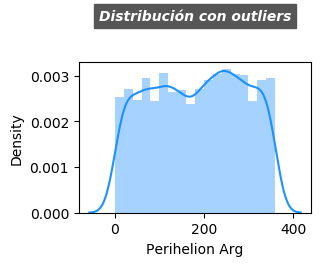

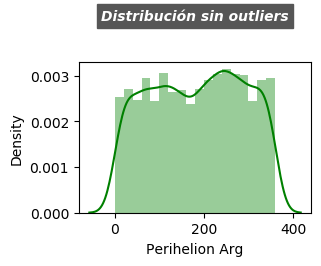

Para la columna Aphelion Dist se tiene:
Número de outliers por IQR: 146
Número de outliers por percentiles .5 y .95: 470
Los datos no distribuyen normal, se hará una transformación de boxcox
los datos no se pudieron tranformar a una normal, no se puede aplicar z-score
Hay 146 outliers comúnes = 0.031149989332195434%


count   146.00
mean      4.67
std       0.55
min       4.24
10%       4.28
20%       4.33
30%       4.38
40%       4.48
50%       4.56
60%       4.61
70%       4.70
80%       4.82
90%       5.23
100%      8.98
max       8.98
Name: Aphelion Dist, dtype: float64

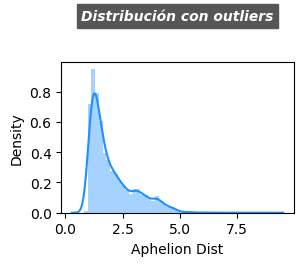

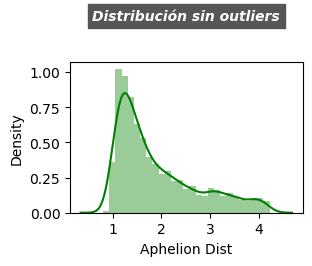

Para la columna Perihelion Time se tiene:
Número de outliers por IQR: 553
Número de outliers por percentiles .5 y .95: 470
Los datos no distribuyen normal, se hará una transformación de boxcox
Los datos transformados distribuyen normal
Número de outliers por z-score: 158
Hay 158 outliers comúnes = 0.03371026242799232%


count       158.00
mean    2453638.07
std        1057.80
min     2450100.32
10%     2452194.11
20%     2452827.39
30%     2453334.90
40%     2453595.67
50%     2453740.02
60%     2454046.45
70%     2454442.00
80%     2454656.55
90%     2454761.11
100%    2454888.65
max     2454888.65
Name: Perihelion Time, dtype: float64

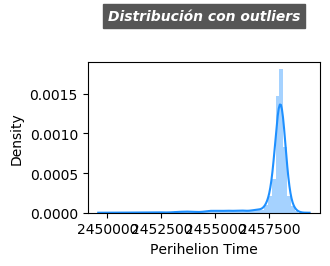

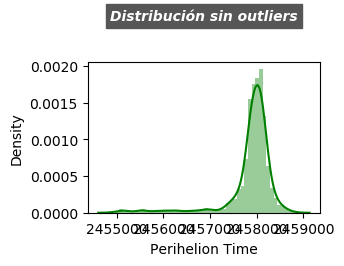

Para la columna Mean Anomaly se tiene:
Número de outliers por IQR: 0
Número de outliers por percentiles .5 y .95: 469
Los datos no distribuyen normal, se hará una transformación de boxcox
los datos no se pudieron tranformar a una normal, no se puede aplicar z-score
Hay 0 outliers comúnes = 0.0%


count   0.00
mean     nan
std      nan
min      nan
10%      nan
20%      nan
30%      nan
40%      nan
50%      nan
60%      nan
70%      nan
80%      nan
90%      nan
100%     nan
max      nan
Name: Mean Anomaly, dtype: float64

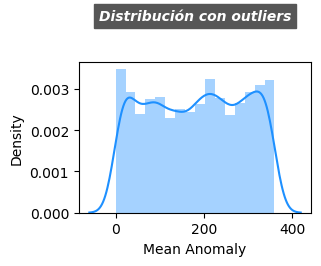

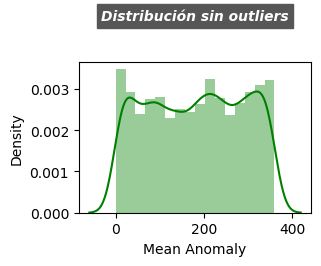

Para la columna Mean Motion se tiene:
Número de outliers por IQR: 14
Número de outliers por percentiles .5 y .95: 470
Los datos no distribuyen normal, se hará una transformación de boxcox
los datos no se pudieron tranformar a una normal, no se puede aplicar z-score
Hay 14 outliers comúnes = 0.002986985278429699%


count   14.00
mean     1.90
std      0.06
min      1.80
10%      1.83
20%      1.86
30%      1.89
40%      1.89
50%      1.90
60%      1.92
70%      1.94
80%      1.95
90%      1.95
100%     2.04
max      2.04
Name: Mean Motion, dtype: float64

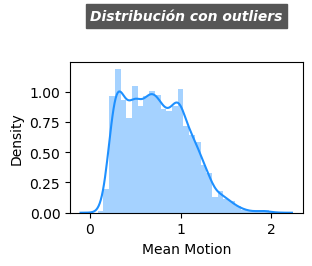

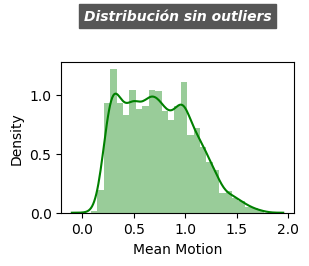

Para la columna Hazardous se tiene:
Número de outliers por IQR: 755
Número de outliers por percentiles .5 y .95: 0
Los datos no distribuyen normal, se hará una transformación de boxcox
los datos no se pudieron tranformar a una normal, no se puede aplicar z-score
Hay 0 outliers comúnes = 0.0%


count   0.00
mean     nan
std      nan
min      nan
10%      nan
20%      nan
30%      nan
40%      nan
50%      nan
60%      nan
70%      nan
80%      nan
90%      nan
100%     nan
max      nan
Name: Hazardous, dtype: float64

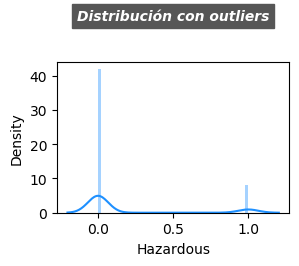

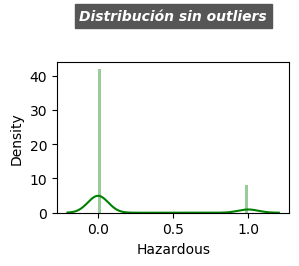

In [15]:
#vamos a buscar outliers
for col in df.select_dtypes(["float64", "int64"]).columns:
    x = outliers_tests(df,col )

In [16]:
cols_outliers = ["Relative Velocity km per sec", "Miss Dist.(Astronomical)", "Minimum Orbit Intersection", "Eccentricity",
                  "Inclination", "Perihelion Distance"]

Para la columna Relative Velocity km per sec se tiene:
Número de outliers por IQR: 101
Número de outliers por percentiles .5 y .95: 470
Los datos no distribuyen normal, se hará una transformación de boxcox
los datos no se pudieron tranformar a una normal, no se puede aplicar z-score
Hay 101 outliers comúnes = 0.021548965222957114%


count   101.00
mean     36.43
std       2.82
min      32.56
10%      33.07
20%      33.93
30%      34.70
40%      35.23
50%      35.75
60%      36.50
70%      37.94
80%      39.06
90%      40.17
100%     44.63
max      44.63
Name: Relative Velocity km per sec, dtype: float64

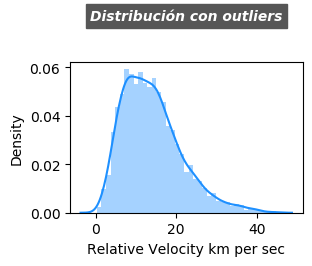

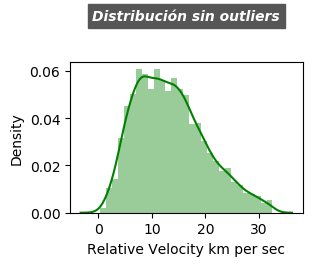

Se borraron 101 registros
Para la columna Miss Dist.(Astronomical) se tiene:
Número de outliers por IQR: 0
Número de outliers por percentiles .5 y .95: 460
Los datos no distribuyen normal, se hará una transformación de boxcox
los datos no se pudieron tranformar a una normal, no se puede aplicar z-score
Hay 0 outliers comúnes = 0.0%


count   0.00
mean     nan
std      nan
min      nan
10%      nan
20%      nan
30%      nan
40%      nan
50%      nan
60%      nan
70%      nan
80%      nan
90%      nan
100%     nan
max      nan
Name: Miss Dist.(Astronomical), dtype: float64

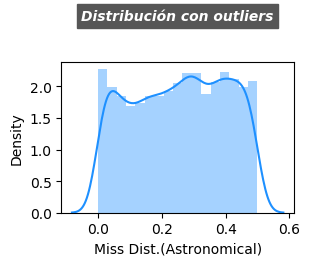

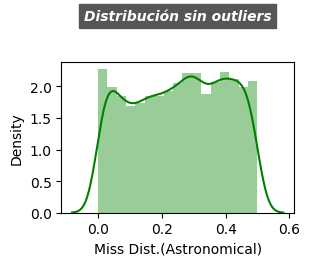

Se borraron 0 registros
Para la columna Minimum Orbit Intersection se tiene:
Número de outliers por IQR: 198
Número de outliers por percentiles .5 y .95: 459
Los datos no distribuyen normal, se hará una transformación de boxcox
los datos no se pudieron tranformar a una normal, no se puede aplicar z-score
Hay 198 outliers comúnes = 0.043174880069777585%


count   198.00
mean      0.34
std       0.05
min       0.28
10%       0.29
20%       0.30
30%       0.30
40%       0.31
50%       0.32
60%       0.34
70%       0.36
80%       0.38
90%       0.41
100%      0.48
max       0.48
Name: Minimum Orbit Intersection, dtype: float64

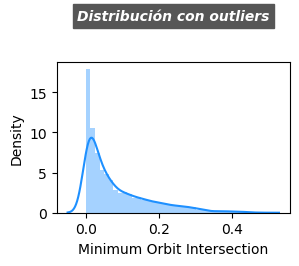

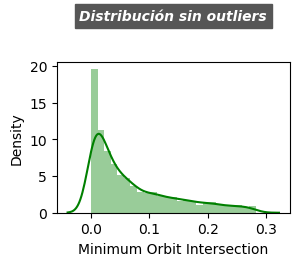

Se borraron 198 registros
Para la columna Eccentricity se tiene:
Número de outliers por IQR: 2
Número de outliers por percentiles .5 y .95: 440
Los datos no distribuyen normal, se hará una transformación de boxcox
los datos no se pudieron tranformar a una normal, no se puede aplicar z-score
Hay 2 outliers comúnes = 0.00045578851412944393%


count   2.00
mean    0.92
std     0.01
min     0.91
10%     0.91
20%     0.91
30%     0.91
40%     0.92
50%     0.92
60%     0.92
70%     0.92
80%     0.92
90%     0.92
100%    0.93
max     0.93
Name: Eccentricity, dtype: float64

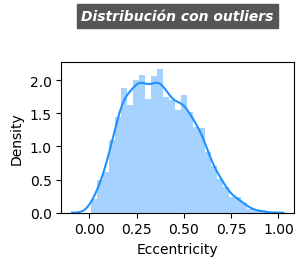

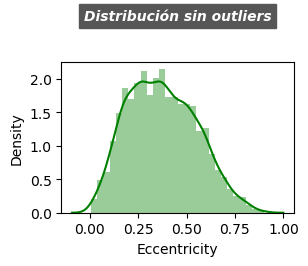

Se borraron 2 registros
Para la columna Inclination se tiene:
Número de outliers por IQR: 93
Número de outliers por percentiles .5 y .95: 439
Los datos no distribuyen normal, se hará una transformación de boxcox
los datos no se pudieron tranformar a una normal, no se puede aplicar z-score
Hay 93 outliers comúnes = 0.021203830369357045%


count   93.00
mean    45.04
std      6.08
min     38.15
10%     38.88
20%     39.39
30%     40.68
40%     41.84
50%     43.56
60%     45.03
70%     47.75
80%     50.15
90%     55.03
100%    62.91
max     62.91
Name: Inclination, dtype: float64

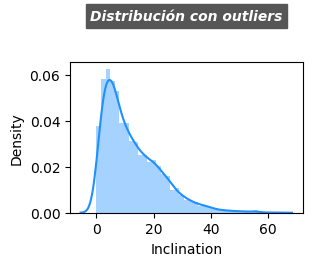

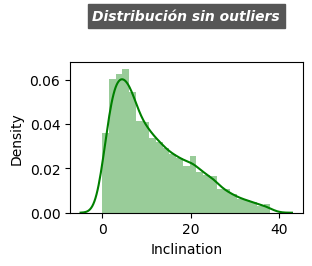

Se borraron 93 registros
Para la columna Perihelion Distance se tiene:
Número de outliers por IQR: 0
Número de outliers por percentiles .5 y .95: 430
Los datos no distribuyen normal, se hará una transformación de boxcox
los datos no se pudieron tranformar a una normal, no se puede aplicar z-score
Hay 0 outliers comúnes = 0.0%


count   0.00
mean     nan
std      nan
min      nan
10%      nan
20%      nan
30%      nan
40%      nan
50%      nan
60%      nan
70%      nan
80%      nan
90%      nan
100%     nan
max      nan
Name: Perihelion Distance, dtype: float64

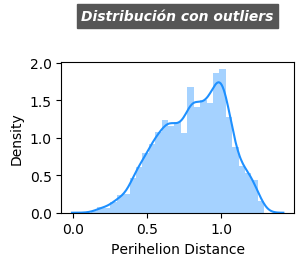

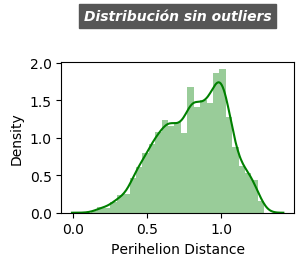

Se borraron 0 registros


In [17]:
df_orig = df.copy()
for col in cols_outliers:
    x = outliers_tests(df,col )
    df = df[~df.index.isin(x)]
    print("Se borraron " + str(len(x)) + " registros")
    df.reset_index(drop=True, inplace = True)

In [18]:
df_orig["Hazardous"].value_counts(1)

0   0.84
1   0.16
Name: Hazardous, dtype: float64

In [19]:
df["Hazardous"].value_counts(1)

0   0.84
1   0.16
Name: Hazardous, dtype: float64

# Reducción de dimensiones

In [20]:
#antes elimimanos ids
df.drop(columns=["Neo Reference ID", "Name", "Orbit ID", "Close Approach Date", "Orbit Determination Date"],inplace=True)

In [21]:
#filtro de baja varianza
df.describe(percentiles=np.arange(0.1,1.1,.1))

Absolute Magnitude  Est Dia in KM(min)  Est Dia in KM(max)  \
count             4293.00             4293.00             4293.00   
mean                22.52                0.18                0.41   
std                  2.85                0.36                0.82   
min                 11.16                0.00                0.00   
10%                 19.00                0.01                0.03   
20%                 20.00                0.02                0.05   
30%                 20.80                0.04                0.09   
40%                 21.50                0.06                0.14   
50%                 22.30                0.09                0.21   
60%                 23.20                0.13                0.30   
70%                 24.20                0.18                0.41   
80%                 25.19                0.27                0.59   
90%                 26.50                0.42                0.94   
100%                32.10               15.58               34.84   
max                 32.10               15.58               34.84   

       Est Dia in M(min)  Est Dia in M(max)  Est Dia in Miles(min)  \
count            4293.00            4293.00                4293.00   
mean              183.93             411.28                   0.11   
std               364.54             815.15                   0.23   
min                 1.01               2.26                   0.00   
10%                13.32              29.79                   0.01   
20%                24.30              54.34                   0.02   
30%                38.42              85.91                   0.02   
40%                60.89             136.16                   0.04   
50%                92.16             206.08                   0.06   
60%               133.22             297.88                   0.08   
70%               183.89             411.19                   0.11   
80%               265.80             594.35                   0.17   
90%               421.26             941.98                   0.26   
100%            15579.55           34836.94                   9.68   
max             15579.55           34836.94                   9.68   

       Est Dia in Miles(max)  Est Dia in Feet(min)  Est Dia in Feet(max)  \
count                4293.00               4293.00               4293.00   
mean                    0.26                603.45               1349.36   
std                     0.51               1196.01               2674.36   
min                     0.00                  3.32                  7.41   
10%                     0.02                 43.71                 97.73   
20%                     0.03                 79.72                178.27   
30%                     0.05                126.05                281.85   
40%                     0.08                199.77                446.71   
50%                     0.13                302.37                676.12   
60%                     0.19                437.06                977.29   
70%                     0.26                603.31               1349.04   
80%                     0.37                872.05               1949.96   
90%                     0.59               1382.10               3090.47   
100%                   21.65              51114.02             114294.42   
max                    21.65              51114.02             114294.42   

       Epoch Date Close Approach  Relative Velocity km per sec  \
count                    4293.00                       4293.00   
mean            1181948464570.23                         13.16   
std              198882492771.70                          6.28   
min              788947200000.00                          0.34   
10%              885456000000.00                          5.61   
20%              971593200000.00                          7.46   
30%             1060930800000.00                          9.01   
40%             1139385600000.00    

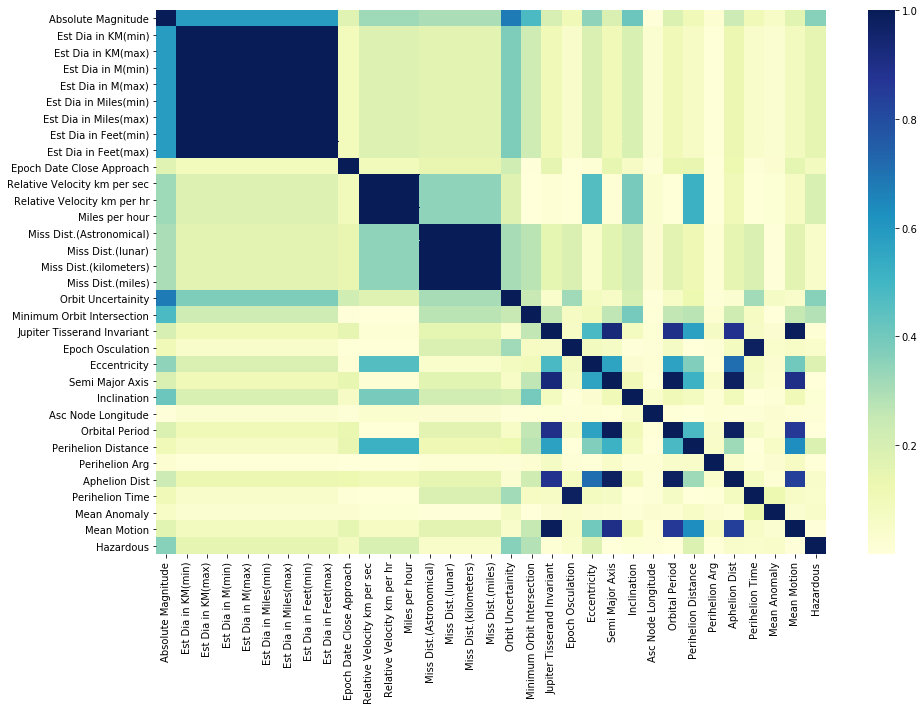

In [22]:
#filtro de alta correlación
corr=df.corr(method="pearson")
corr=abs(corr)
plt.figure(figsize=(15, 10))
sns.heatmap(corr,  cmap="YlGnBu")

In [23]:
for col in corr.columns:
    display(corr[[col]][corr[[col]]>.8].dropna())

Absolute Magnitude
Absolute Magnitude                1.00

Est Dia in KM(min)
Est Dia in KM(min)                   1.00
Est Dia in KM(max)                   1.00
Est Dia in M(min)                    1.00
Est Dia in M(max)                    1.00
Est Dia in Miles(min)                1.00
Est Dia in Miles(max)                1.00
Est Dia in Feet(min)                 1.00
Est Dia in Feet(max)                 1.00

Est Dia in KM(max)
Est Dia in KM(min)                   1.00
Est Dia in KM(max)                   1.00
Est Dia in M(min)                    1.00
Est Dia in M(max)                    1.00
Est Dia in Miles(min)                1.00
Est Dia in Miles(max)                1.00
Est Dia in Feet(min)                 1.00
Est Dia in Feet(max)                 1.00

Est Dia in M(min)
Est Dia in KM(min)                  1.00
Est Dia in KM(max)                  1.00
Est Dia in M(min)                   1.00
Est Dia in M(max)                   1.00
Est Dia in Miles(min)               1.00
Est Dia in Miles(max)               1.00
Est Dia in Feet(min)                1.00
Est Dia in Feet(max)                1.00

Est Dia in M(max)
Est Dia in KM(min)                  1.00
Est Dia in KM(max)                  1.00
Est Dia in M(min)                   1.00
Est Dia in M(max)                   1.00
Est Dia in Miles(min)               1.00
Est Dia in Miles(max)               1.00
Est Dia in Feet(min)                1.00
Est Dia in Feet(max)                1.00

Est Dia in Miles(min)
Est Dia in KM(min)                      1.00
Est Dia in KM(max)                      1.00
Est Dia in M(min)                       1.00
Est Dia in M(max)                       1.00
Est Dia in Miles(min)                   1.00
Est Dia in Miles(max)                   1.00
Est Dia in Feet(min)                    1.00
Est Dia in Feet(max)                    1.00

Est Dia in Miles(max)
Est Dia in KM(min)                      1.00
Est Dia in KM(max)                      1.00
Est Dia in M(min)                       1.00
Est Dia in M(max)                       1.00
Est Dia in Miles(min)                   1.00
Est Dia in Miles(max)                   1.00
Est Dia in Feet(min)                    1.00
Est Dia in Feet(max)                    1.00

Est Dia in Feet(min)
Est Dia in KM(min)                     1.00
Est Dia in KM(max)                     1.00
Est Dia in M(min)                      1.00
Est Dia in M(max)                      1.00
Est Dia in Miles(min)                  1.00
Est Dia in Miles(max)                  1.00
Est Dia in Feet(min)                   1.00
Est Dia in Feet(max)                   1.00

Est Dia in Feet(max)
Est Dia in KM(min)                     1.00
Est Dia in KM(max)                     1.00
Est Dia in M(min)                      1.00
Est Dia in M(max)                      1.00
Est Dia in Miles(min)                  1.00
Est Dia in Miles(max)                  1.00
Est Dia in Feet(min)                   1.00
Est Dia in Feet(max)                   1.00

Epoch Date Close Approach
Epoch Date Close Approach                       1.00

Relative Velocity km per sec
Relative Velocity km per sec                          1.00
Relative Velocity km per hr                           1.00
Miles per hour                                        1.00

Relative Velocity km per hr
Relative Velocity km per sec                         1.00
Relative Velocity km per hr                          1.00
Miles per hour                                       1.00

Miles per hour
Relative Velocity km per sec            1.00
Relative Velocity km per hr             1.00
Miles per hour                          1.00

Miss Dist.(Astronomical)
Miss Dist.(Astronomical)                      1.00
Miss Dist.(lunar)                             1.00
Miss Dist.(kilometers)                        1.00
Miss Dist.(miles)                             1.00

Miss Dist.(lunar)
Miss Dist.(Astronomical)               1.00
Miss Dist.(lunar)                      1.00
Miss Dist.(kilometers)                 1.00
Miss Dist.(miles)                      1.00

Miss Dist.(kilometers)
Miss Dist.(Astronomical)                    1.00
Miss Dist.(lunar)                           1.00
Miss Dist.(kilometers)                      1.00
Miss Dist.(miles)                           1.00

Miss Dist.(miles)
Miss Dist.(Astronomical)               1.00
Miss Dist.(lunar)                      1.00
Miss Dist.(kilometers)                 1.00
Miss Dist.(miles)                      1.00

Orbit Uncertainity
Orbit Uncertainity                1.00

Minimum Orbit Intersection
Minimum Orbit Intersection                        1.00

Jupiter Tisserand Invariant
Jupiter Tisserand Invariant                         1.00
Semi Major Axis                                     0.93
Orbital Period                                      0.90
Aphelion Dist                                       0.89
Mean Motion                                         0.99

Epoch Osculation
Epoch Osculation              1.00
Perihelion Time               0.98

Eccentricity
Eccentricity          1.00

Semi Major Axis
Jupiter Tisserand Invariant             0.93
Semi Major Axis                         1.00
Orbital Period                          1.00
Aphelion Dist                           0.98
Mean Motion                             0.90

Inclination
Inclination         1.00

Asc Node Longitude
Asc Node Longitude                1.00

Orbital Period
Jupiter Tisserand Invariant            0.90
Semi Major Axis                        1.00
Orbital Period                         1.00
Aphelion Dist                          0.98
Mean Motion                            0.86

Perihelion Distance
Perihelion Distance                 1.00

Perihelion Arg
Perihelion Arg            1.00

Aphelion Dist
Jupiter Tisserand Invariant           0.89
Semi Major Axis                       0.98
Orbital Period                        0.98
Aphelion Dist                         1.00
Mean Motion                           0.84

Perihelion Time
Epoch Osculation             0.98
Perihelion Time              1.00

Mean Anomaly
Mean Anomaly          1.00

Mean Motion
Jupiter Tisserand Invariant         0.99
Semi Major Axis                     0.90
Orbital Period                      0.86
Aphelion Dist                       0.84
Mean Motion                         1.00

Hazardous
Hazardous       1.00

In [24]:
df.drop(columns=["Est Dia in KM(min)", "Est Dia in KM(max)", "Est Dia in Miles(min)", "Est Dia in Miles(max)",
                "Est Dia in Feet(min)", "Est Dia in Feet(max)", "Relative Velocity km per hr", "Miles per hour",
                "Miss Dist.(lunar)", "Miss Dist.(kilometers)", "Miss Dist.(miles)"],inplace=True)

In [25]:
#filtro de alta correlación
corr=df[[x for x in df if x!="Hazardous"]].corr(method="pearson")
corr=abs(corr)
for col in corr.columns:
    display(corr[[col]][corr[[col]]>.8].dropna())

Absolute Magnitude
Absolute Magnitude                1.00

Est Dia in M(min)
Est Dia in M(min)               1.00
Est Dia in M(max)               1.00

Est Dia in M(max)
Est Dia in M(min)               1.00
Est Dia in M(max)               1.00

Epoch Date Close Approach
Epoch Date Close Approach                       1.00

Relative Velocity km per sec
Relative Velocity km per sec                          1.00

Miss Dist.(Astronomical)
Miss Dist.(Astronomical)                      1.00

Orbit Uncertainity
Orbit Uncertainity                1.00

Minimum Orbit Intersection
Minimum Orbit Intersection                        1.00

Jupiter Tisserand Invariant
Jupiter Tisserand Invariant                         1.00
Semi Major Axis                                     0.93
Orbital Period                                      0.90
Aphelion Dist                                       0.89
Mean Motion                                         0.99

Epoch Osculation
Epoch Osculation              1.00
Perihelion Time               0.98

Eccentricity
Eccentricity          1.00

Semi Major Axis
Jupiter Tisserand Invariant             0.93
Semi Major Axis                         1.00
Orbital Period                          1.00
Aphelion Dist                           0.98
Mean Motion                             0.90

Inclination
Inclination         1.00

Asc Node Longitude
Asc Node Longitude                1.00

Orbital Period
Jupiter Tisserand Invariant            0.90
Semi Major Axis                        1.00
Orbital Period                         1.00
Aphelion Dist                          0.98
Mean Motion                            0.86

Perihelion Distance
Perihelion Distance                 1.00

Perihelion Arg
Perihelion Arg            1.00

Aphelion Dist
Jupiter Tisserand Invariant           0.89
Semi Major Axis                       0.98
Orbital Period                        0.98
Aphelion Dist                         1.00
Mean Motion                           0.84

Perihelion Time
Epoch Osculation             0.98
Perihelion Time              1.00

Mean Anomaly
Mean Anomaly          1.00

Mean Motion
Jupiter Tisserand Invariant         0.99
Semi Major Axis                     0.90
Orbital Period                      0.86
Aphelion Dist                       0.84
Mean Motion                         1.00

In [26]:
df.drop(columns=["Est Dia in M(min)", "Est Dia in M(max)", "Semi Major Axis", "Orbital Period", "Aphelion Dist",
                "Mean Motion"],inplace=True)

In [27]:
#filtro de alta correlación
corr=df[[x for x in df if x!="Hazardous"]].corr(method="pearson")
corr=abs(corr)
for col in corr.columns:
    display(corr[[col]][corr[[col]]>.8].dropna())

Absolute Magnitude
Absolute Magnitude                1.00

Epoch Date Close Approach
Epoch Date Close Approach                       1.00

Relative Velocity km per sec
Relative Velocity km per sec                          1.00

Miss Dist.(Astronomical)
Miss Dist.(Astronomical)                      1.00

Orbit Uncertainity
Orbit Uncertainity                1.00

Minimum Orbit Intersection
Minimum Orbit Intersection                        1.00

Jupiter Tisserand Invariant
Jupiter Tisserand Invariant                         1.00

Epoch Osculation
Epoch Osculation              1.00
Perihelion Time               0.98

Eccentricity
Eccentricity          1.00

Inclination
Inclination         1.00

Asc Node Longitude
Asc Node Longitude                1.00

Perihelion Distance
Perihelion Distance                 1.00

Perihelion Arg
Perihelion Arg            1.00

Perihelion Time
Epoch Osculation             0.98
Perihelion Time              1.00

Mean Anomaly
Mean Anomaly          1.00

In [28]:
df.drop(columns=["Epoch Osculation"],inplace=True)

In [29]:
#filtro de alta correlación
corr=df[[x for x in df if x!="Hazardous"]].corr(method="spearman")
corr=abs(corr)
for col in corr.columns:
    display(corr[[col]][corr[[col]]>.7].dropna())

Absolute Magnitude
Absolute Magnitude                1.00

Epoch Date Close Approach
Epoch Date Close Approach                       1.00

Relative Velocity km per sec
Relative Velocity km per sec                          1.00

Miss Dist.(Astronomical)
Miss Dist.(Astronomical)                      1.00

Orbit Uncertainity
Orbit Uncertainity                1.00

Minimum Orbit Intersection
Minimum Orbit Intersection                        1.00

Jupiter Tisserand Invariant
Jupiter Tisserand Invariant                         1.00

Eccentricity
Eccentricity          1.00

Inclination
Inclination         1.00

Asc Node Longitude
Asc Node Longitude                1.00

Perihelion Distance
Perihelion Distance                 1.00

Perihelion Arg
Perihelion Arg            1.00

Perihelion Time
Perihelion Time             1.00

Mean Anomaly
Mean Anomaly          1.00

In [30]:
df.shape

(4293, 15)

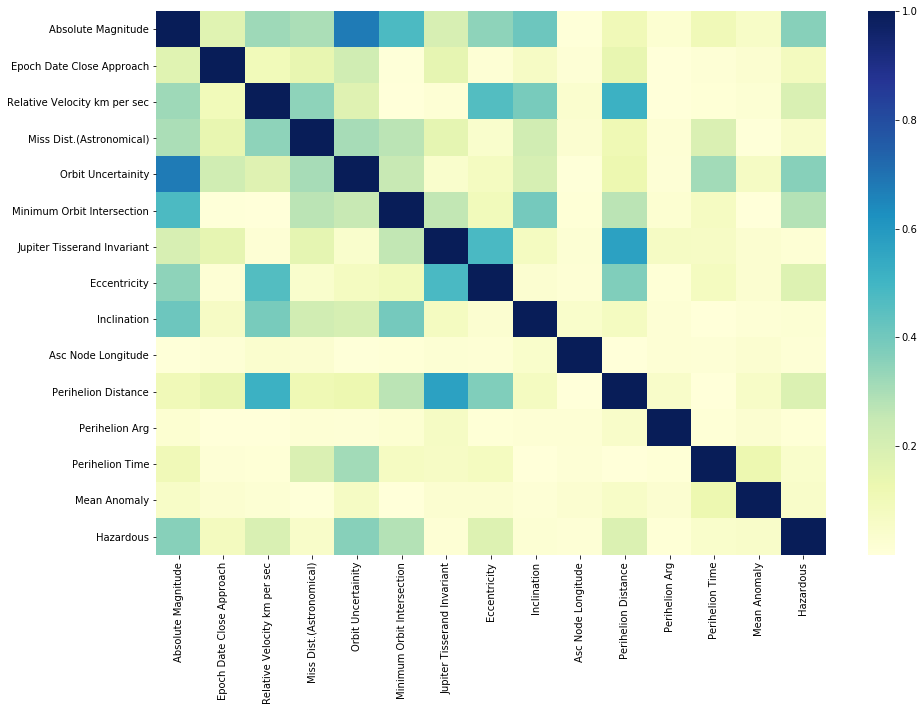

In [31]:
#Heatmap final
corr=df.corr(method="pearson")
corr=abs(corr)
plt.figure(figsize=(15, 10))
sns.heatmap(corr,  cmap="YlGnBu")

In [32]:
#Baja correlación con el objetivo
corr=df.corr(method="spearman")
corr=abs(corr)
corr[["Hazardous"]].sort_values(by = 'Hazardous',ascending = False).style.background_gradient()

In [33]:
df.drop(columns=["Asc Node Longitude","Perihelion Arg", "Perihelion Time","Jupiter Tisserand Invariant",'Epoch Date Close Approach',"Mean Anomaly" ],inplace=True)

In [34]:
for col in df.columns:
    df[col]=df[col].astype(float)
    
X=df[[x for x in df if x!="Hazardous"]]

aux=calc_vif(X)

aux.sort_values(by = "VIF", ascending = False)

variables   VIF
0            Absolute Magnitude 33.30
7           Perihelion Distance 18.57
1  Relative Velocity km per sec 12.86
5                  Eccentricity  8.18
2      Miss Dist.(Astronomical)  5.55
6                   Inclination  4.61
3            Orbit Uncertainity  3.62
4    Minimum Orbit Intersection  3.54

# Pipeline

In [35]:
#ahora que ya conocemos la TAD para correr algoritmos, vamos a crear un pipeline que simplifique los pasos

from sklearn.impute import SimpleImputer
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline

#definimos la única clase
class select_columns(TransformerMixin):
    
    def fit(self, X, y=None):
        self.columns = ['Absolute Magnitude', 'Relative Velocity km per sec',
       'Miss Dist.(Astronomical)', 'Orbit Uncertainity',
       'Minimum Orbit Intersection', 'Eccentricity', 'Inclination',
       'Perihelion Distance']
        return self

    def transform(self, X):
        #X = X[np.intersect1d(X.columns, self.columns)]
        X = X[self.columns]
        #X.reset_index(inplace = True, drop = True)
        return X
    
#instanseamos la clase   
select_cols = select_columns()

#entrenamos la clase
select_cols.fit(df)

#Se la ponemos al pipeline
pipeline=Pipeline(steps=[("select_cols",select_cols)])


#leer el df original
df_orig =  pd.read_csv("nasa.csv")
df_orig["Hazardous"] = df_orig["Hazardous"].map({True:1, False:0})

# Análisis Exploratorio

In [36]:
df_aux = df.copy()
df_aux["Hazardous"] = df_aux["Hazardous"].map({1:"True", 0:"False"})
df_aux.columns

Index(['Absolute Magnitude', 'Relative Velocity km per sec',
       'Miss Dist.(Astronomical)', 'Orbit Uncertainity',
       'Minimum Orbit Intersection', 'Eccentricity', 'Inclination',
       'Perihelion Distance', 'Hazardous'],
      dtype='object')

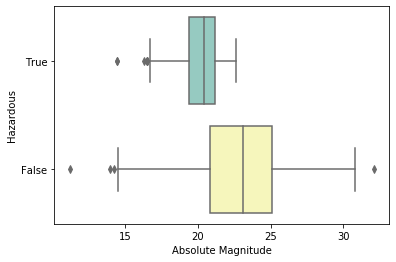

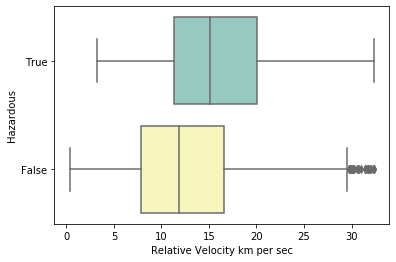

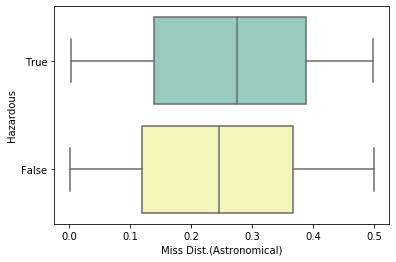

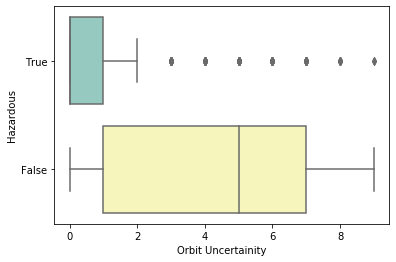

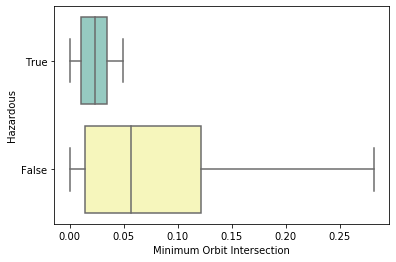

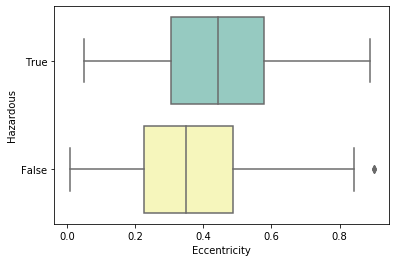

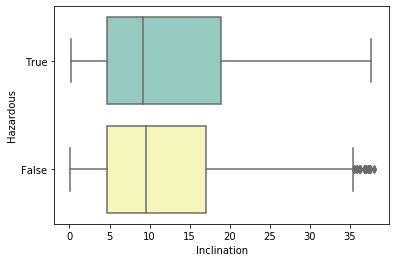

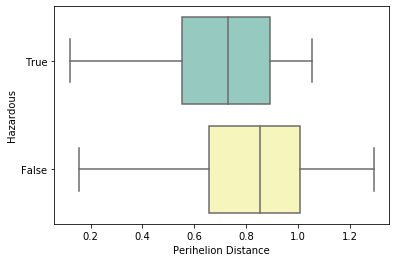

In [37]:
for col in df_aux.loc[:, df_aux.columns != 'Hazardous'].columns:
    sns.boxplot(x=col, y="Hazardous",data=df_aux, palette="Set3")
    plt.show()

In [38]:
 px.scatter(df_aux, x='Minimum Orbit Intersection', y='Absolute Magnitude', color='Hazardous')

In [39]:
px.scatter_3d(df_aux, x='Minimum Orbit Intersection', y='Absolute Magnitude', z='Orbit Uncertainity',
              color='Hazardous',opacity=0.7)

In [40]:
df_aux.columns

Index(['Absolute Magnitude', 'Relative Velocity km per sec',
       'Miss Dist.(Astronomical)', 'Orbit Uncertainity',
       'Minimum Orbit Intersection', 'Eccentricity', 'Inclination',
       'Perihelion Distance', 'Hazardous'],
      dtype='object')

In [41]:
df_aux["Orbit Uncertainity"] = df_aux["Orbit Uncertainity"].astype(str)

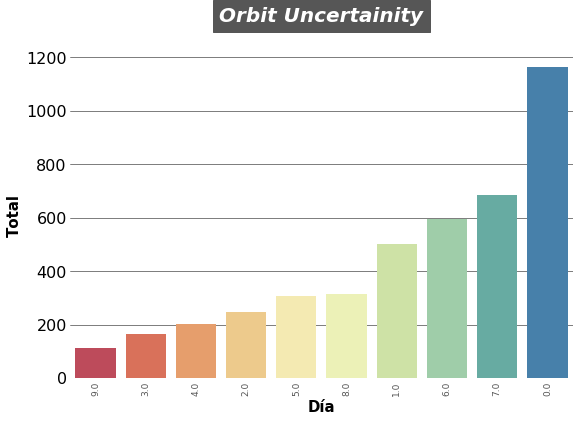

In [42]:
#análisis del día
df_aux1 = df_aux.groupby(by=["Orbit Uncertainity"]).size().reset_index(name="count").sort_values(by = "count", ascending = True)
fig,ax = plt.subplots(figsize=(9,6))
sns.barplot(x="Orbit Uncertainity", y="count",  data=df_aux1,ci=95,ax=ax, palette = 'Spectral')
ax.set_title("Orbit Uncertainity", backgroundcolor='#565656', fontsize=20, weight='bold',color='white',
             style='italic',loc='center',pad=30)
ax.tick_params(labelsize=16,length=0) #Remove the tick line
plt.box(False) #Remove the borders of the bar chart
# add grid lines for y axis
ax.yaxis.grid(linewidth=0.5,color='black')
# put the grid lines below bars
ax.set_axisbelow(True)

ax.set_xlabel("Día",weight='bold',size=15)
ax.set_ylabel("Total",weight='bold',size=15)
plt.xticks(rotation=90,color='#565656', size = 9)
plt.savefig('temp.png', transparent=True)

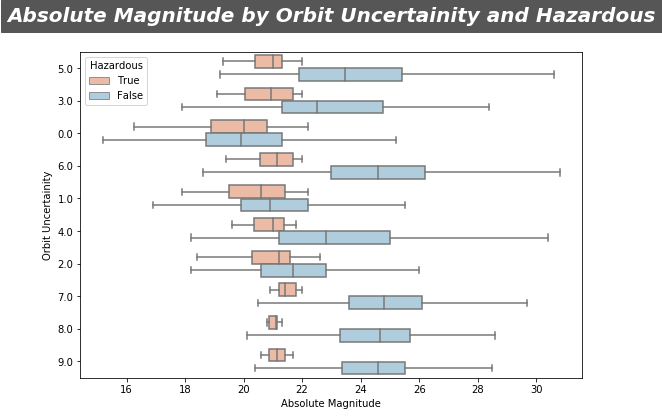

In [43]:
fig,ax = plt.subplots(figsize=(9,6))
ax.set_title("Absolute Magnitude by Orbit Uncertainity and Hazardous", backgroundcolor='#565656', fontsize=20, weight='bold',color='white',
             style='italic',loc='center',pad=30)
sns.boxplot(y = "Orbit Uncertainity" , x='Absolute Magnitude', data = df_aux , showfliers = False,
            hue="Hazardous",  palette="RdBu")

# Modelos sin balancear

In [44]:
X=df.loc[:, df.columns != 'Hazardous']
y=df["Hazardous"]

In [45]:
df.shape

(4293, 9)

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=.30, random_state=2174,stratify=y)

In [47]:
y_train.value_counts(1)

0.00   0.84
1.00   0.16
Name: Hazardous, dtype: float64

In [48]:
y_test.value_counts(1)

0.00   0.84
1.00   0.16
Name: Hazardous, dtype: float64

In [49]:
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score,StratifiedKFold

## KNN 

In [50]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()

X_train_sc = sc_X.fit_transform(X_train) 
X_test_sc = sc_X.transform(X_test)

knn=KNeighborsClassifier()
param_knn = dict(n_neighbors = range(4,60))
model_knn=random_search(X_train_sc,y_train,knn,param_knn)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Score : 0.9682776845716733
Best Params : {'n_neighbors': 22}


Accuracy  Precision  Recall   F1  TPR  FPR  AUC
0      0.94       0.87    0.76 0.81 0.76 0.02 0.98

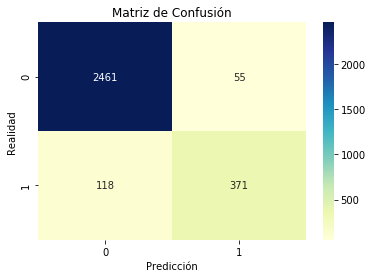

In [51]:
#Metricas en Train
metrics_clasif(model_knn, X_train_sc, y_train)

Accuracy  Precision  Recall   F1  TPR  FPR  AUC
0      0.94       0.88    0.73 0.80 0.73 0.02 0.98

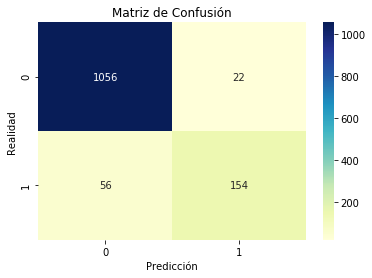

In [52]:
#Metricas en test
metrics_clasif(model_knn, X_test_sc, y_test)

In [53]:
#Estabilidad
pipeline_act=Pipeline(steps=pipeline.steps + [("model",model_knn)])
plot_estabilidad(df_orig,pipeline_act,"Hazardous")

## SVM

In [54]:
#SVM
classifier_ker = SVC(random_state = 0,probability=True)

param_grid = dict(kernel=['linear', 'poly', 'rbf', 'sigmoid'],
                 degree=[2,3,4,5,6])

model_svm=random_search(X_train,y_train,classifier_ker,param_grid)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Score : 0.9591547368197482
Best Params : {'kernel': 'linear', 'degree': 5}


Accuracy  Precision  Recall   F1  TPR  FPR  AUC
0      0.91       0.84    0.56 0.67 0.56 0.02 0.97

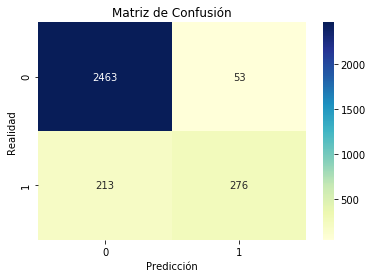

In [55]:
#Metricas en Train
metrics_clasif(model_svm, X_train, y_train)

Accuracy  Precision  Recall   F1  TPR  FPR  AUC
0      0.92       0.86    0.61 0.72 0.61 0.02 0.97

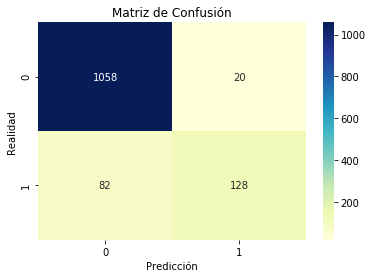

In [56]:
#Metricas en test
metrics_clasif(model_svm, X_test, y_test)

In [57]:
#Estabilidad
pipeline_act=Pipeline(steps=pipeline.steps + [("model",model_svm)])
plot_estabilidad(df_orig,pipeline_act,"Hazardous")

## Árbol de decisión

In [58]:
#Árbol 
arbol = DecisionTreeClassifier()

param_grid = dict(criterion = ["gini", "entropy"],
                 max_depth=np.arange(5,30))

model_arbol=random_search(X_train,y_train,arbol,param_grid)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Score : 0.9889796503955438
Best Params : {'max_depth': 18, 'criterion': 'gini'}


Accuracy  Precision  Recall   F1  TPR  FPR  AUC
0      1.00       1.00    1.00 1.00 1.00 0.00 1.00

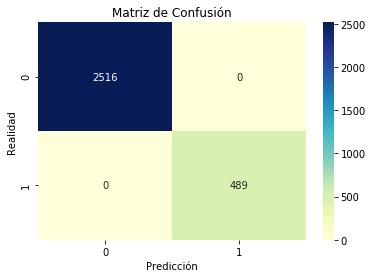

In [59]:
#Metricas en Train
metrics_clasif(model_arbol, X_train, y_train)

Accuracy  Precision  Recall   F1  TPR  FPR  AUC
0      1.00       0.99    0.99 0.99 0.99 0.00 0.99

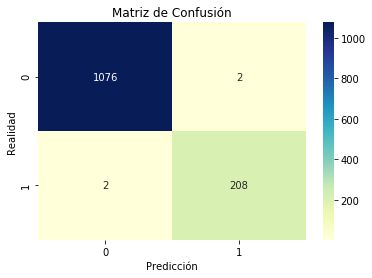

In [60]:
#Metricas en test
metrics_clasif(model_arbol, X_test, y_test)

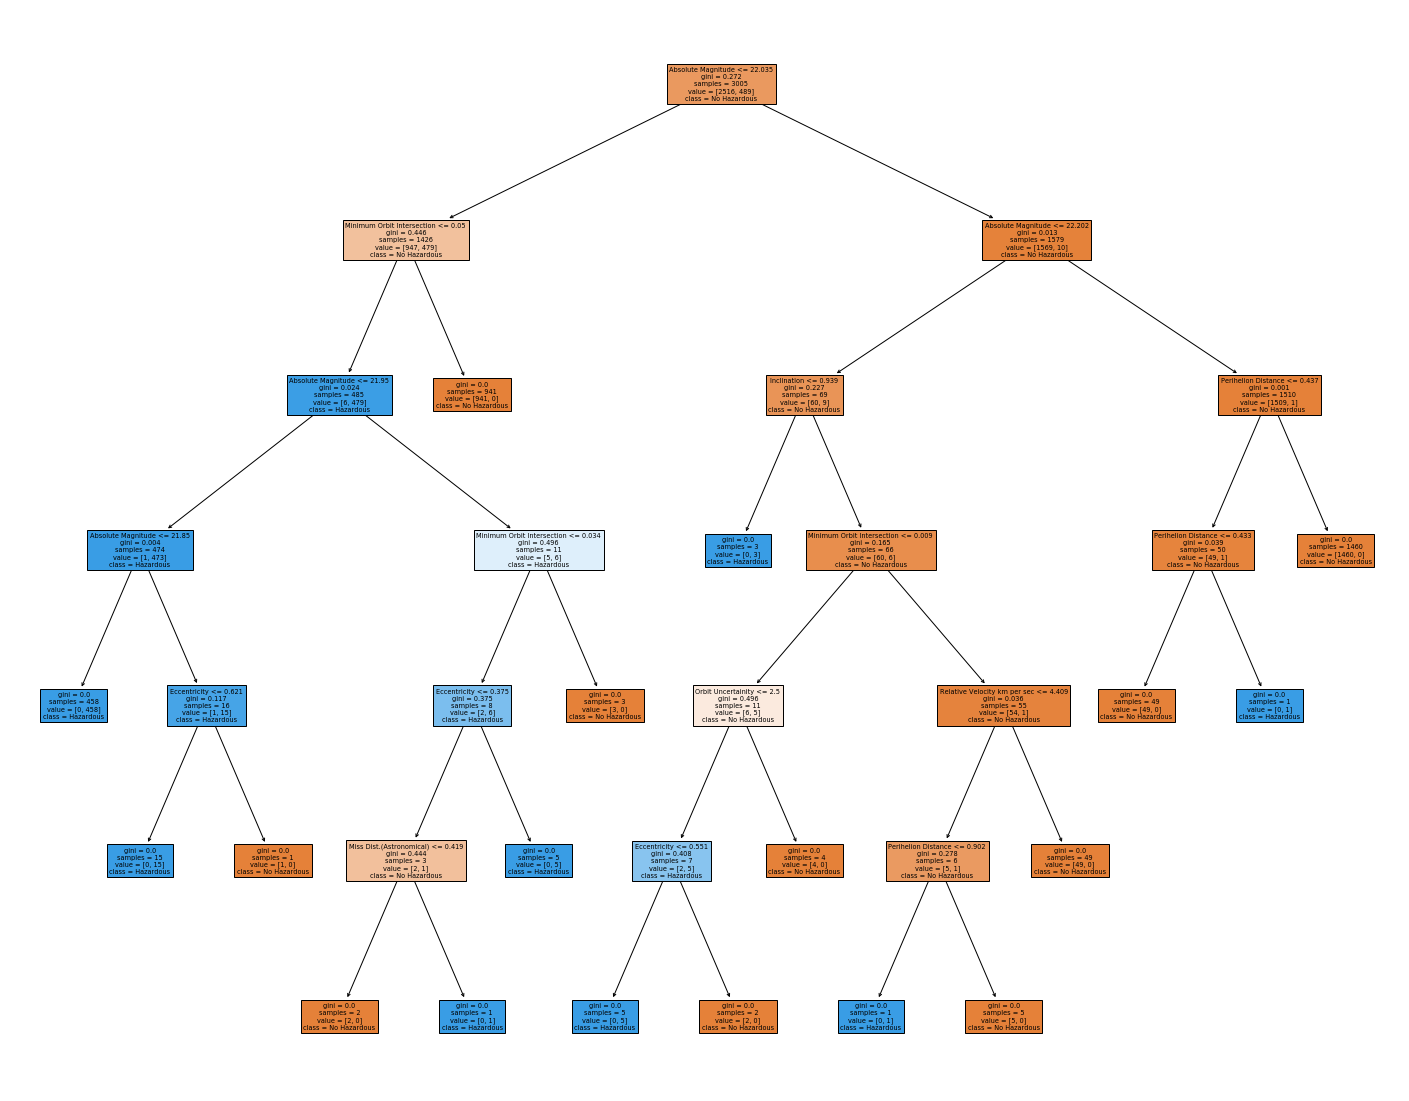

In [61]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model_arbol, 
                   
                    feature_names=X.columns,  
                   
                   class_names=["No Hazardous","Hazardous"],
                   filled=True)

In [62]:
#Estabilidad
pipeline_act=Pipeline(steps=pipeline.steps + [("model",model_arbol)])
plot_estabilidad(df_orig,pipeline_act,"Hazardous")

## Gradiente descendiente

In [63]:
#Gradiente
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()

param_grid = dict(loss = ["log"],
                 penalty=["l2","l1","elasticnet"],
                 alpha=np.arange(0.00001,.3,.001))
model_sgd=random_search(X_train,y_train,sgd,param_grid)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Score : 0.8307243222758964
Best Params : {'penalty': 'elasticnet', 'loss': 'log', 'alpha': 0.00701}


Accuracy  Precision  Recall   F1  TPR  FPR  AUC
0      0.82       0.43    0.43 0.43 0.43 0.11 0.84

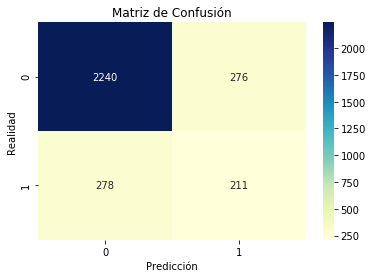

In [64]:
#Metricas en Train
metrics_clasif(model_sgd, X_train, y_train)

Accuracy  Precision  Recall   F1  TPR  FPR  AUC
0      0.84       0.52    0.48 0.50 0.48 0.09 0.87

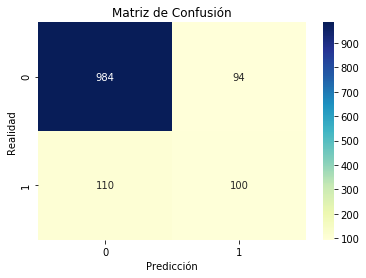

In [65]:
#Metricas en test
metrics_clasif(model_sgd, X_test, y_test)

In [66]:
#Estabilidad
pipeline_act=Pipeline(steps=pipeline.steps + [("model",model_sgd)])
plot_estabilidad(df_orig,pipeline_act,"Hazardous")

## Regresión Logística

In [67]:
#Regresión Logística
from sklearn.linear_model import LogisticRegression
log= LogisticRegression()

param_grid = dict(solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                 penalty=["l2","l1","elasticnet"])

model_log=random_search(X_train,y_train,log,param_grid)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Score : 0.9277138011169024
Best Params : {'solver': 'newton-cg', 'penalty': 'l2'}


Accuracy  Precision  Recall   F1  TPR  FPR  AUC
0      0.89       0.76    0.44 0.56 0.44 0.03 0.94

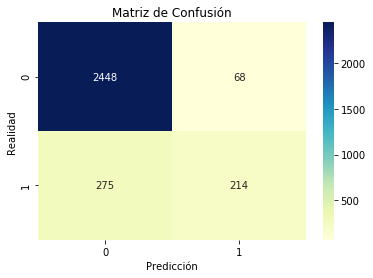

In [68]:
#Metricas en Train
metrics_clasif(model_log, X_train, y_train)

Accuracy  Precision  Recall   F1  TPR  FPR  AUC
0      0.89       0.78    0.47 0.59 0.47 0.03 0.95

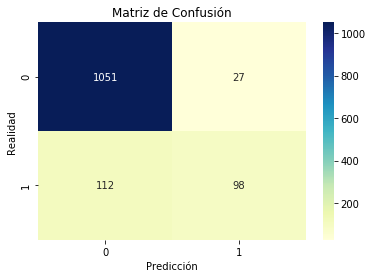

In [69]:
#Metricas en test
metrics_clasif(model_log, X_test, y_test)

In [70]:
#Estabilidad
pipeline_act=Pipeline(steps=pipeline.steps + [("model",model_log)])
plot_estabilidad(df_orig,pipeline_act,"Hazardous")

## Random forest

In [71]:
#Bagging
from sklearn.ensemble import RandomForestClassifier
random= RandomForestClassifier()

param_grid = dict(n_estimators = range(100,300,10),
                 criterion=["gini", "entropy"],
                 max_depth=np.arange(3,15),
                  max_features = ["auto", "sqrt", "log2"],
                  bootstrap=[True,False],
                  oob_score=[True,False],
                 min_samples_leaf=np.arange(.01,.2, .1))
model_random=random_search(X_train,y_train,random,param_grid)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Score : 0.9995776376177329
Best Params : {'oob_score': False, 'n_estimators': 290, 'min_samples_leaf': 0.01, 'max_features': 'log2', 'max_depth': 7, 'criterion': 'gini', 'bootstrap': True}


Accuracy  Precision  Recall   F1  TPR  FPR  AUC
0      0.99       0.99    0.98 0.98 0.98 0.00 1.00

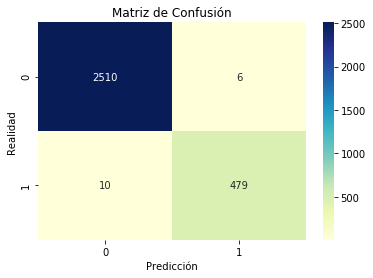

In [72]:
#Metricas en Train
metrics_clasif(model_random, X_train, y_train)

Accuracy  Precision  Recall   F1  TPR  FPR  AUC
0      1.00       0.99    0.99 0.99 0.99 0.00 1.00

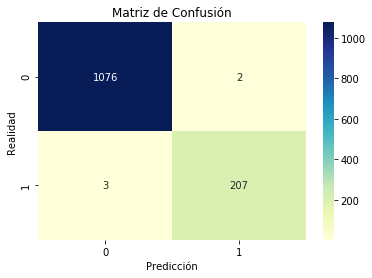

In [73]:
#Metricas en test
metrics_clasif(model_random, X_test, y_test)

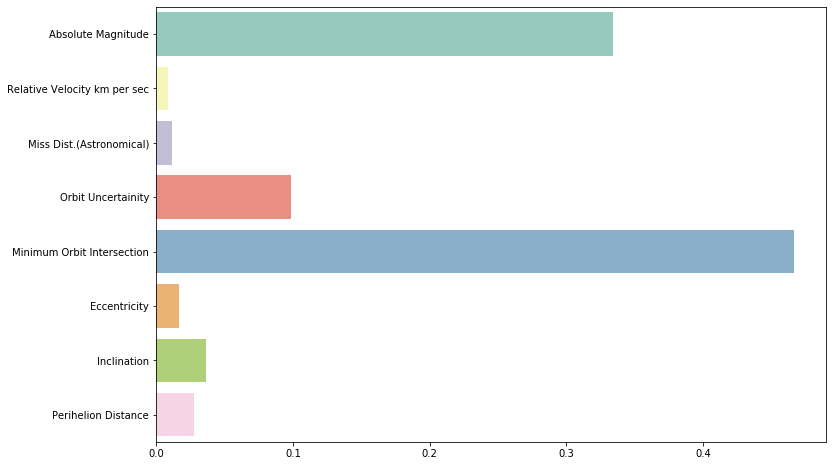

In [74]:
#Feature Importance
plt.figure(figsize=(12, 8))
sns.barplot(x=model_random.feature_importances_, y=X.columns,palette="Set3")
plt.show()

In [75]:
#Estabilidad
pipeline_act=Pipeline(steps=pipeline.steps + [("model",model_random)])
plot_estabilidad(df_orig,pipeline_act,"Hazardous")

## Adaboost

In [76]:
#Adaboost
from sklearn.ensemble import AdaBoostClassifier
ada= AdaBoostClassifier()

param_grid = dict(learning_rate=np.arange(0.1,1,.1) )

model_ada=random_search(X_train,y_train,ada,param_grid)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best Score : 0.9994924850922517
Best Params : {'learning_rate': 0.30000000000000004}


Accuracy  Precision  Recall   F1  TPR  FPR  AUC
0      1.00       0.99    1.00 0.99 1.00 0.00 1.00

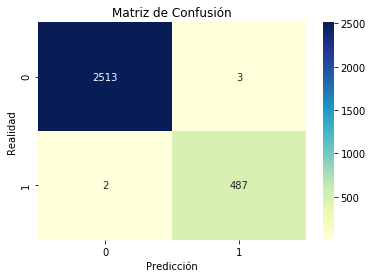

In [77]:
#Metricas en Train
metrics_clasif(model_ada, X_train, y_train)

Accuracy  Precision  Recall   F1  TPR  FPR  AUC
0      1.00       1.00    0.98 0.99 0.98 0.00 1.00

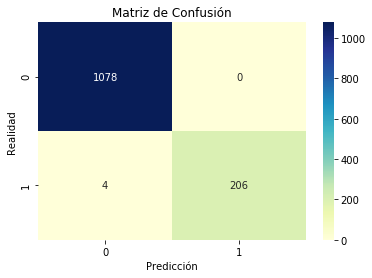

In [78]:
#Metricas en test
metrics_clasif(model_ada, X_test, y_test)

In [79]:
#Estabilidad
pipeline_act=Pipeline(steps=pipeline.steps + [("model",model_ada)])
plot_estabilidad(df_orig,pipeline_act,"Hazardous")

# Modelos con oversampling

In [80]:
# Modelos con oversampling
from  imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority',random_state = 2174)
X_train_ov, y_train_ov = oversample.fit_resample(X_train, y_train)

In [81]:
y_train_ov.value_counts()

0.00    2516
1.00    2516
Name: Hazardous, dtype: int64

## KNN

In [82]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()

X_train_sc_ov = sc_X.fit_transform(X_train_ov) 
X_test_sc = sc_X.transform(X_test)

knn=KNeighborsClassifier()
param_knn = dict(n_neighbors = range(4,60))
model_knn_ov=random_search(X_train_sc_ov,y_train_ov,knn,param_knn)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Score : 0.982128622910522
Best Params : {'n_neighbors': 19}


Accuracy  Precision  Recall   F1  TPR  FPR  AUC
0      0.93       0.88    0.99 0.94 0.99 0.13 0.99

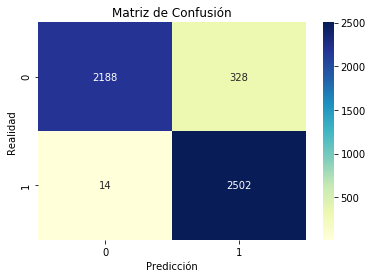

In [83]:
#Metricas en Train
metrics_clasif(model_knn_ov, X_train_sc_ov, y_train_ov)

Accuracy  Precision  Recall   F1  TPR  FPR  AUC
0      0.89       0.59    0.99 0.74 0.99 0.13 0.98

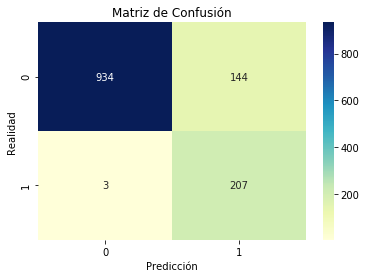

In [84]:
#Metricas en test
metrics_clasif(model_knn_ov, X_test_sc, y_test)

In [85]:
#Estabilidad
pipeline_act=Pipeline(steps=pipeline.steps + [("model",model_knn_ov)])
plot_estabilidad(df_orig,pipeline_act,"Hazardous")

## SVM

In [86]:
#SVM
classifier_ker = SVC(random_state = 0,probability=True)

param_grid = dict(kernel=['linear', 'poly', 'rbf', 'sigmoid'],
                 degree=[2,3,4,5,6])

model_svm_ov=random_search(X_train_ov,y_train_ov,classifier_ker,param_grid)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Score : 0.9661355041827674
Best Params : {'kernel': 'linear', 'degree': 3}


Accuracy  Precision  Recall   F1  TPR  FPR  AUC
0      0.92       0.88    0.98 0.93 0.98 0.13 0.97

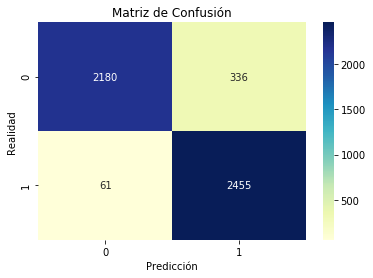

In [87]:
#Metricas en Train
metrics_clasif(model_svm_ov, X_train_ov, y_train_ov)

Accuracy  Precision  Recall   F1  TPR  FPR  AUC
0      0.90       0.62    0.98 0.76 0.98 0.12 0.98

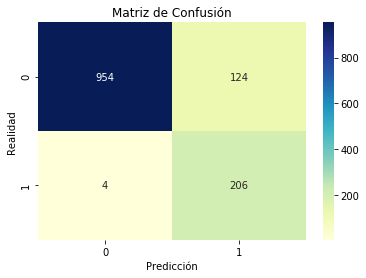

In [88]:
#Metricas en test
metrics_clasif(model_svm_ov, X_test, y_test)

In [89]:
#Estabilidad
pipeline_act=Pipeline(steps=pipeline.steps + [("model",model_svm_ov)])
plot_estabilidad(df_orig,pipeline_act,"Hazardous")

## Árbol de decisión

In [90]:
#Árbol 
arbol = DecisionTreeClassifier()

param_grid = dict(criterion = ["gini", "entropy"],
                 max_depth=np.arange(5,30),
                 min_samples_leaf=np.arange(.01,.2, .1))

model_arbol_ov=random_search(X_train_ov,y_train_ov,arbol,param_grid)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Score : 0.9995053253328651
Best Params : {'min_samples_leaf': 0.01, 'max_depth': 11, 'criterion': 'entropy'}


Accuracy  Precision  Recall   F1  TPR  FPR  AUC
0      0.99       0.99    1.00 0.99 1.00 0.01 1.00

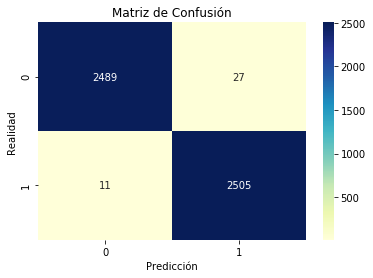

In [91]:
#Metricas en Train
metrics_clasif(model_arbol_ov, X_train_ov, y_train_ov)

Accuracy  Precision  Recall   F1  TPR  FPR  AUC
0      0.99       0.94    1.00 0.97 1.00 0.01 1.00

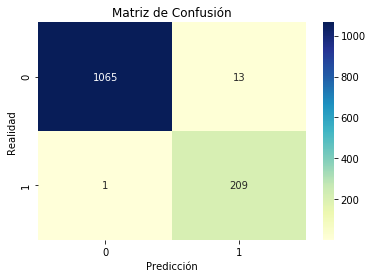

In [92]:
#Metricas en test
metrics_clasif(model_arbol_ov, X_test, y_test)

In [93]:
#Estabilidad
pipeline_act=Pipeline(steps=pipeline.steps + [("model",model_arbol_ov)])
plot_estabilidad(df_orig,pipeline_act,"Hazardous")

## Gradiente descendiente

In [94]:
#Gradiente
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()

param_grid = dict(loss = ["log"],
                 penalty=["l2","l1","elasticnet"],
                 alpha=np.arange(0.00001,.3,.001))
model_sgd_ov=random_search(X_train_ov,y_train_ov,sgd,param_grid)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Score : 0.8107887482138002
Best Params : {'penalty': 'l2', 'loss': 'log', 'alpha': 0.04501}


Accuracy  Precision  Recall   F1  TPR  FPR  AUC
0      0.70       0.77    0.57 0.65 0.57 0.17 0.82

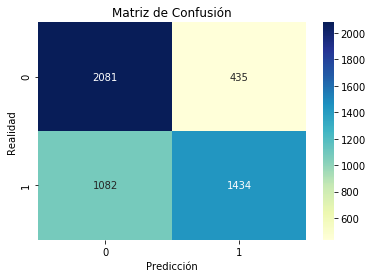

In [95]:
#Metricas en Train
metrics_clasif(model_sgd_ov, X_train_ov, y_train_ov)

Accuracy  Precision  Recall   F1  TPR  FPR  AUC
0      0.81       0.44    0.64 0.53 0.64 0.16 0.85

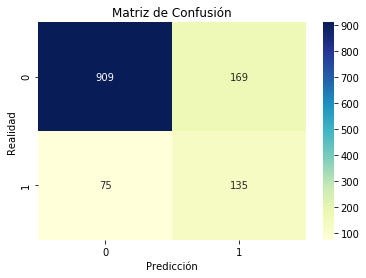

In [96]:
#Metricas en test
metrics_clasif(model_sgd_ov, X_test, y_test)

In [97]:
#Estabilidad
pipeline_act=Pipeline(steps=pipeline.steps + [("model",model_sgd_ov)])
plot_estabilidad(df_orig,pipeline_act,"Hazardous")

## Regresión Logística

In [98]:
from sklearn.linear_model import LogisticRegression
log= LogisticRegression()

param_grid = dict(solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                 penalty=["l2","l1","elasticnet"])

model_log_ov=random_search(X_train_ov,y_train_ov,log,param_grid)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Score : 0.9508297574833746
Best Params : {'solver': 'liblinear', 'penalty': 'l2'}


Accuracy  Precision  Recall   F1  TPR  FPR  AUC
0      0.89       0.87    0.93 0.90 0.93 0.14 0.96

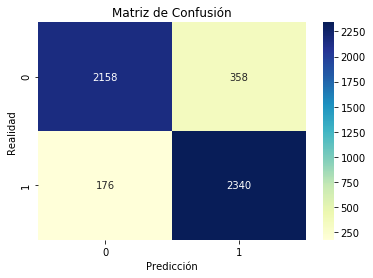

In [99]:
#Metricas en Train
metrics_clasif(model_log_ov, X_train_ov, y_train_ov)

Accuracy  Precision  Recall   F1  TPR  FPR  AUC
0      0.89       0.61    0.94 0.74 0.94 0.12 0.97

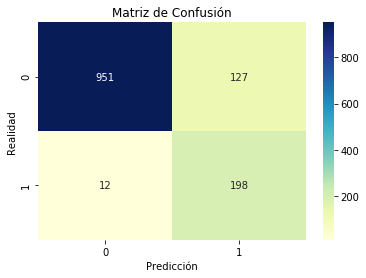

In [100]:
#Metricas en test
metrics_clasif(model_log_ov, X_test, y_test)

In [101]:
#Estabilidad
pipeline_act=Pipeline(steps=pipeline.steps + [("model",model_log_ov)])
plot_estabilidad(df_orig,pipeline_act,"Hazardous")

## Random forest


In [102]:
#Bagging
from sklearn.ensemble import RandomForestClassifier
random= RandomForestClassifier()

param_grid = dict(n_estimators = range(100,300,10),
                 criterion=["gini", "entropy"],
                 max_depth=np.arange(3,15),
                  max_features = ["auto", "sqrt", "log2"],
                  bootstrap=[True,False],
                  oob_score=[True,False],
                 min_samples_leaf=np.arange(.03,.2, .01))
model_random_ov=random_search(X_train_ov,y_train_ov,random,param_grid)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Score : 0.9993079077995028
Best Params : {'oob_score': False, 'n_estimators': 120, 'min_samples_leaf': 0.060000000000000005, 'max_features': 'log2', 'max_depth': 11, 'criterion': 'entropy', 'bootstrap': False}


Accuracy  Precision  Recall   F1  TPR  FPR  AUC
0      0.99       0.99    1.00 0.99 1.00 0.01 1.00

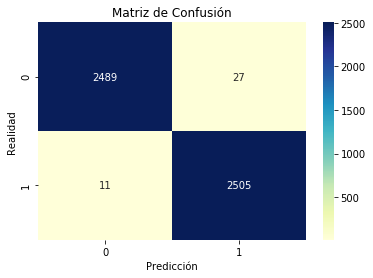

In [103]:
#Metricas en Train
metrics_clasif(model_random_ov, X_train_ov, y_train_ov)

Accuracy  Precision  Recall   F1  TPR  FPR  AUC
0      0.99       0.94    1.00 0.97 1.00 0.01 1.00

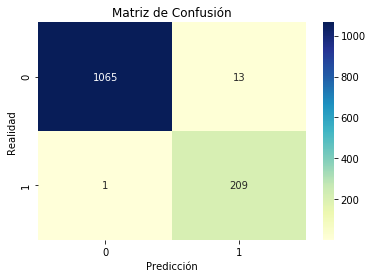

In [104]:
#Metricas en test
metrics_clasif(model_random_ov, X_test, y_test)

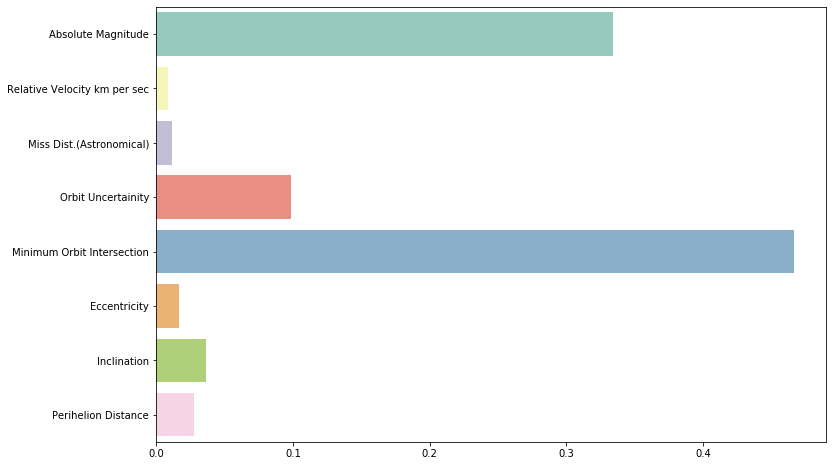

In [105]:
#Feature Importance
plt.figure(figsize=(12, 8))
sns.barplot(x=model_random.feature_importances_, y=X.columns,palette="Set3")
plt.show()

In [106]:
#Estabilidad
pipeline_act=Pipeline(steps=pipeline.steps + [("model",model_random_ov)])
plot_estabilidad(df_orig,pipeline_act,"Hazardous")

## Adaboost

In [107]:
#Adaboost
from sklearn.ensemble import AdaBoostClassifier
ada= AdaBoostClassifier()

param_grid = dict(learning_rate=np.arange(0.01,1,.01) )

model_ada_ov=random_search(X_train_ov,y_train_ov,ada,param_grid)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Score : 0.9997917132880711
Best Params : {'learning_rate': 0.54}


Accuracy  Precision  Recall   F1  TPR  FPR  AUC
0      1.00       1.00    1.00 1.00 1.00 0.00 1.00

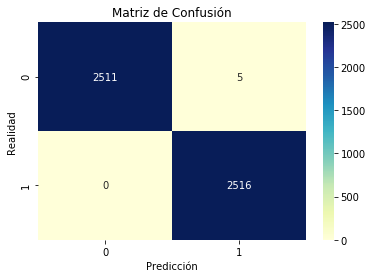

In [108]:
#Metricas en Train
metrics_clasif(model_ada_ov, X_train_ov, y_train_ov)

Accuracy  Precision  Recall   F1  TPR  FPR  AUC
0      1.00       0.99    1.00 0.99 1.00 0.00 1.00

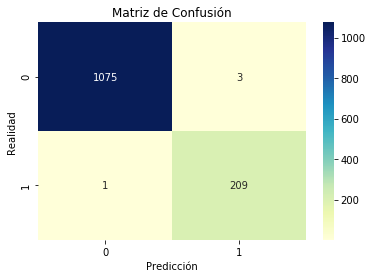

In [109]:
#Metricas en test
metrics_clasif(model_ada_ov, X_test, y_test)

In [110]:
#Estabilidad
pipeline_act=Pipeline(steps=pipeline.steps + [("model",model_ada_ov)])
plot_estabilidad(df_orig,pipeline_act,"Hazardous")

# Mejor modelo

In [111]:
X=df[["Minimum Orbit Intersection", "Absolute Magnitude","Orbit Uncertainity" ]]
y=df[["Hazardous"]]

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=.30, random_state=2174,stratify=y)
#Árbol 
arbol = DecisionTreeClassifier()

param_grid = dict(criterion = ["gini", "entropy"],
                 max_depth=np.arange(2,30),
                  min_samples_leaf=np.arange(.01,.2, .1))

model_arbol_ok=random_search(X_train,y_train,arbol,param_grid)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Score : 0.998707096435344
Best Params : {'min_samples_leaf': 0.01, 'max_depth': 26, 'criterion': 'gini'}


Accuracy  Precision  Recall   F1  TPR  FPR  AUC
0      0.99       0.99    0.98 0.98 0.98 0.00 1.00

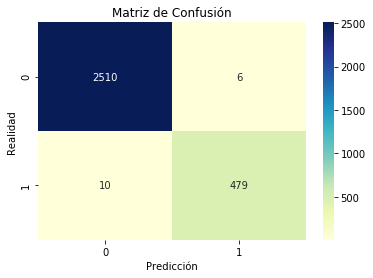

In [112]:
#Metricas en Train
metrics_clasif(model_arbol_ok, X_train, y_train)

Accuracy  Precision  Recall   F1  TPR  FPR  AUC
0      1.00       0.99    0.99 0.99 0.99 0.00 1.00

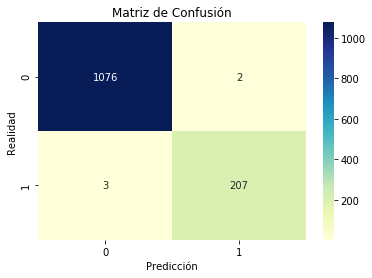

In [113]:
#Metricas en Test
metrics_clasif(model_arbol_ok, X_test, y_test)

[Text(639.375, 978.48, 'Absolute Magnitude <= 22.035\ngini = 0.272\nsamples = 3005\nvalue = [2516, 489]\nclass = No Hazardous'),
 Text(348.75, 761.0400000000001, 'Minimum Orbit Intersection <= 0.05\ngini = 0.446\nsamples = 1426\nvalue = [947, 479]\nclass = No Hazardous'),
 Text(232.5, 543.6, 'Absolute Magnitude <= 21.75\ngini = 0.024\nsamples = 485\nvalue = [6, 479]\nclass = Hazardous'),
 Text(116.25, 326.1600000000001, 'gini = 0.0\nsamples = 445\nvalue = [0, 445]\nclass = Hazardous'),
 Text(348.75, 326.1600000000001, 'gini = 0.255\nsamples = 40\nvalue = [6, 34]\nclass = Hazardous'),
 Text(465.0, 543.6, 'gini = 0.0\nsamples = 941\nvalue = [941, 0]\nclass = No Hazardous'),
 Text(930.0, 761.0400000000001, 'Absolute Magnitude <= 22.202\ngini = 0.013\nsamples = 1579\nvalue = [1569, 10]\nclass = No Hazardous'),
 Text(697.5, 543.6, 'Minimum Orbit Intersection <= 0.052\ngini = 0.227\nsamples = 69\nvalue = [60, 9]\nclass = No Hazardous'),
 Text(581.25, 326.1600000000001, 'gini = 0.412\nsamples

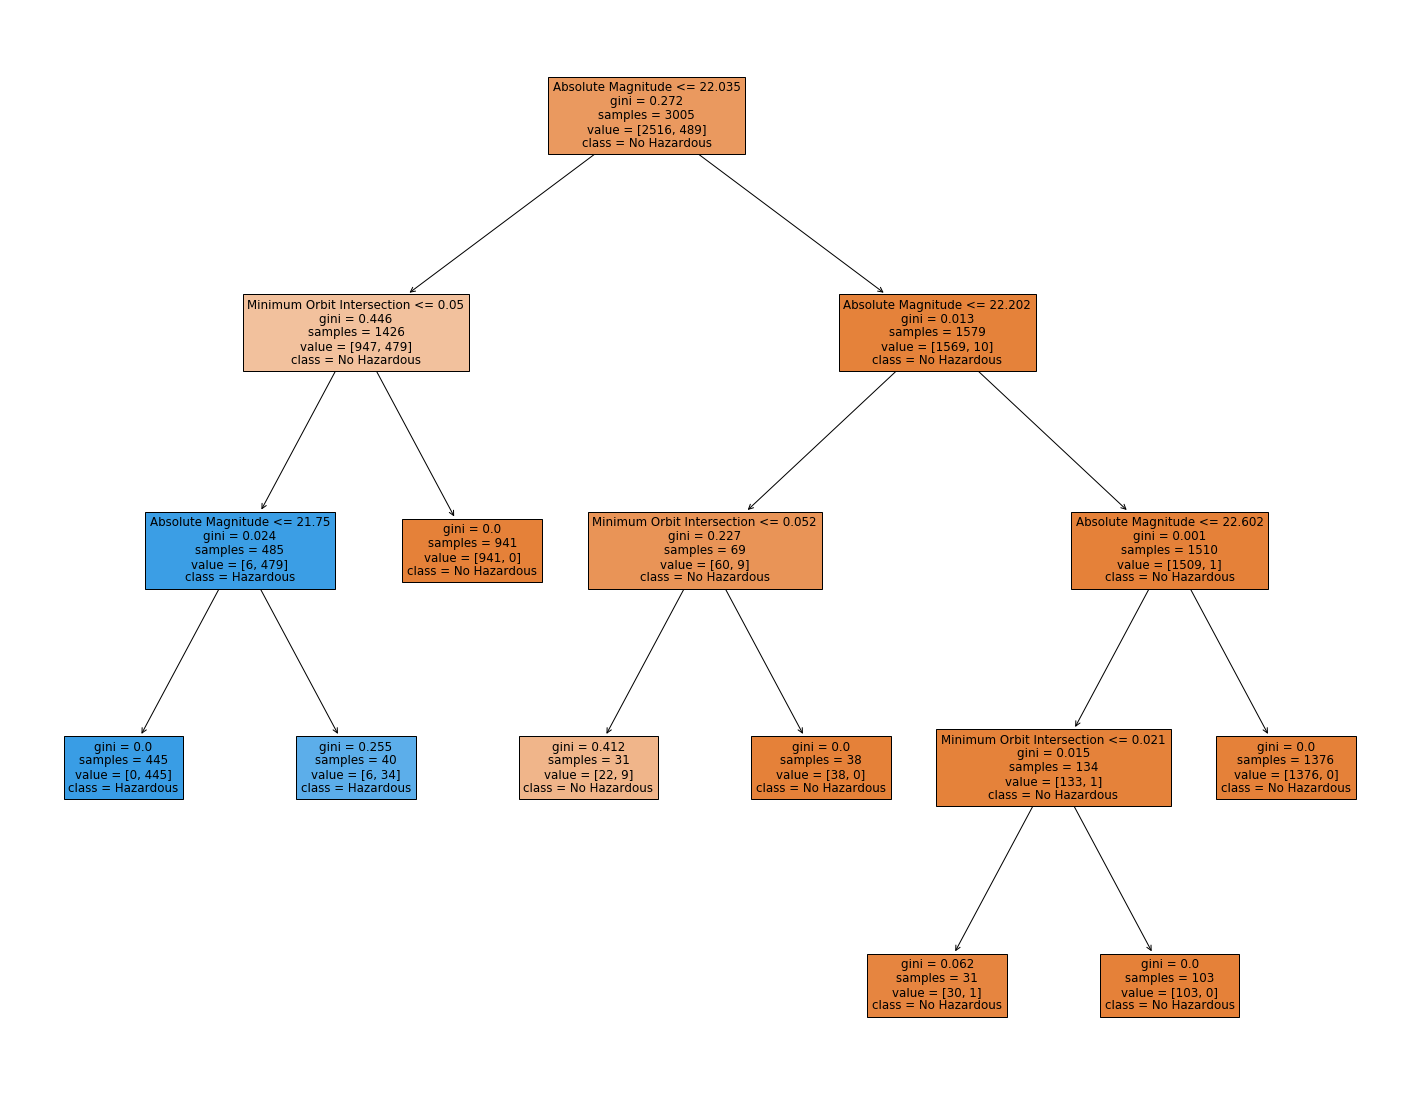

In [114]:
fig = plt.figure(figsize=(25,20))
from sklearn import tree
tree.plot_tree(model_arbol_ok, 
                   
                    feature_names=X.columns,  
                   
                   class_names=["No Hazardous","Hazardous"],
                   filled=True)

# Pipeline final

In [115]:
from sklearn.impute import SimpleImputer
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline

#definimos la única clase
class select_columns(TransformerMixin):
    
    def fit(self, X, y=None):
        self.columns = ["Minimum Orbit Intersection", "Absolute Magnitude","Orbit Uncertainity"]
        return self

    def transform(self, X):
        #X = X[np.intersect1d(X.columns, self.columns)]
        X = X[self.columns]
        #X.reset_index(inplace = True, drop = True)
        return X
    
#instanseamos la clase   
select_cols = select_columns()

#entrenamos la clase
select_cols.fit(X_train)

#Se la ponemos al pipeline
pipeline=Pipeline(steps=[("select_cols",select_cols)])

#añadir modelo del árbol
pipeline_ok=Pipeline(steps=pipeline.steps + [("model_arbol",model_arbol_ok)])

#leer el df original
df_orig =  pd.read_csv("nasa.csv")
df_orig["Hazardous"] = df_orig["Hazardous"].map({True:1, False:0})


In [116]:
plot_estabilidad(df_orig,pipeline_ok,"Hazardous")

# Pickle

In [117]:
import pickle

# Save to file in the current working directory
pkl_filename = "pickle_nasa.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(pipeline_ok, file)